In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the data file
file_path = '/content/drive/MyDrive/data_sets/laptop.csv'
df = pd.read_csv(file_path)
df.head()

Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

         Price  
0   71378.6832  
1   47895.5232  
2   30636.0000  
3  135195.3360  
4   96095.8080

In [ ]:
columns = df.columns
columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
df.shape

(1303, 13)

In [ ]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
df.info() # overview of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
#verify the numeric features

df[['Ram','Weight','Inches']]

Ram  Weight Inches
0      8GB  1.37kg   13.3
1      8GB  1.34kg   13.3
2      8GB  1.86kg   15.6
3     16GB  1.83kg   15.4
4      8GB  1.37kg   13.3
...    ...     ...    ...
1298   4GB   1.8kg     14
1299  16GB   1.3kg   13.3
1300   2GB   1.5kg     14
1301   6GB  2.19kg   15.6
1302   4GB   2.2kg   15.6

[1303 rows x 3 columns]

In [ ]:
#remove text from RAM, Inches and Weight columns

df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg','')
df[['Ram','Weight','Inches']]

Ram Weight Inches
0      8   1.37   13.3
1      8   1.34   13.3
2      8   1.86   15.6
3     16   1.83   15.4
4      8   1.37   13.3
...   ..    ...    ...
1298   4    1.8     14
1299  16    1.3   13.3
1300   2    1.5     14
1301   6   2.19   15.6
1302   4    2.2   15.6

[1303 rows x 3 columns]

In [ ]:
#verify how much % of the data is in the form of null for
percent_null = df[columns].isnull().mean() * 100
percent_null


Unnamed: 0.1        0.000000
Unnamed: 0          2.302379
Company             2.302379
TypeName            2.302379
Inches              2.302379
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              2.302379
Price               2.302379
dtype: float64

In [ ]:
#drop unnecessary features

#Unnamed: 0.1 and Unnamed: 0 both are not usefull since they are serial numbers
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1, inplace=True)

In [ ]:
#null values are less than 5% so we can drop the null values
df.dropna(inplace=True)
df.isnull

<bound method DataFrame.isnull of      Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight        Price  
0     Intel Iris Plus Graphics 640       macOS   1.37   71378.6832  
1           Intel HD Graphics 6000       macOS   1.34   47895.5232  
2            Intel HD Graphics 620       No OS   1.86   30636.0000  
3               AMD Radeon Pro 455       macOS   1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS   1.37   96095.8080  
...                            ...         ...    ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.8   33992.6400  
1299         Intel HD Graphics 520  Windows 10    1.3   79866.7200  
1300             Intel HD Graphics  Windows 10    1.5   12201.1200  
1301            AMD Radeon R5 M330  Windows 10   2.19   40705.9200  
1302             Intel HD Graphics  Windows 10    2.2   19660.3200  

[1273 rows x 11 columns]>

In [ ]:
#verify null values are still present or not
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
#change the data types of Inches, Ram and Weight into numeric type
cols = ['Inches','Ram','Weight']
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.3+ KB


In [ ]:
#count is not matching lets check where is the problem
df['Inches'].unique()


array([13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5,  nan, 31.6, 17. , 15. ,
       14.1, 11.3, 10.1])

In [ ]:
df['Weight'].unique()

array([1.370e+00, 1.340e+00, 1.860e+00, 1.830e+00, 2.100e+00, 2.040e+00,
       1.300e+00, 1.600e+00, 2.200e+00, 9.200e-01, 1.220e+00, 2.500e+00,
       1.620e+00, 1.910e+00, 2.300e+00, 1.350e+00, 1.880e+00, 1.890e+00,
       1.650e+00, 2.710e+00, 1.200e+00, 1.440e+00, 2.800e+00, 2.000e+00,
       2.650e+00, 2.770e+00, 3.200e+00, 1.490e+00, 2.400e+00, 2.130e+00,
       2.430e+00, 1.700e+00, 1.400e+00, 1.800e+00, 1.900e+00, 3.000e+00,
       1.252e+00, 2.700e+00, 2.020e+00, 1.630e+00, 1.960e+00, 1.210e+00,
       2.450e+00, 1.250e+00, 1.500e+00, 2.620e+00, 1.380e+00, 1.580e+00,
       1.850e+00, 1.230e+00, 2.160e+00, 2.360e+00, 7.200e+00, 2.050e+00,
       1.320e+00, 1.750e+00, 9.700e-01, 2.560e+00, 1.480e+00, 1.740e+00,
       1.100e+00, 1.560e+00, 2.030e+00, 1.050e+00, 5.400e+00, 4.400e+00,
       1.290e+00, 1.950e+00, 2.060e+00, 1.120e+00, 3.490e+00, 3.350e+00,
       2.230e+00,       nan, 2.900e+00, 4.420e+00, 2.690e+00, 2.370e+00,
       4.700e+00, 3.600e+00, 2.080e+00, 4.300e+00, 

In [ ]:
# there is a one null value verified in both the features
#lets fill it with mean value
mean_inch = df['Inches'].mean()
mean_weight = df['Weight'].mean()
df['Inches'].fillna(mean_inch,inplace=True)
df['Weight'].fillna(mean_weight,inplace=True)

/tmp/ipython-input-1296568916.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Inches'].fillna(mean_inch,inplace=True)
/tmp/ipython-input-1296568916.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.3+ KB


In [ ]:
df.describe()

Inches          Ram       Weight          Price
count  1273.000000  1273.000000  1273.000000    1273.000000
mean     15.130818     8.462687     2.077618   59955.814073
std       1.953668     5.564408     0.807490   37332.251005
min      10.100000     1.000000     0.000200    9270.720000
25%      14.000000     4.000000     1.500000   31914.720000
50%      15.600000     8.000000     2.040000   52161.120000
75%      15.600000     8.000000     2.320000   79333.387200
max      35.600000    64.000000    11.100000  324954.720000

In [ ]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram               Memory  \
0                     Intel Core i5 2.3GHz    8            128GB SSD   
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3                     Intel Core i7 2.7GHz   16            512GB SSD   
4                     Intel Core i5 3.1GHz    8            256GB SSD   
...                                    ...  ...                  ...   
1298            Intel Core i7 6500U 2.5GHz    4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz   16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz    6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS    1.37   71378.6832  
1           Intel HD Graphics 6000       macOS    1.34   47895.5232  
2            Intel HD Graphics 620       No OS    1.86   30636.0000  
3               AMD Radeon Pro 455       macOS    1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS    1.37   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.80   33992.6400  
1299         Intel HD Graphics 520  Windows 10    1.30   79866.7200  
1300             Intel HD Graphics  Windows 10    1.50   12201.1200  
1301            AMD Radeon R5 M330  Windows 10    2.19   40705.9200  
1302             Intel HD Graphics  Windows 10    2.20   19660.3200  

[1273 rows x 11 columns]

In [ ]:
scrn = df['ScreenResolution'].unique()

In [ ]:
#unique categories in screen resolution feature
scrn_df = pd.DataFrame(scrn,columns=['ScreenResolution'])
scrn_df

ScreenResolution
0              IPS Panel Retina Display 2560x1600
1                                        1440x900
2                               Full HD 1920x1080
3              IPS Panel Retina Display 2880x1800
4                                        1366x768
5                     IPS Panel Full HD 1920x1080
6              IPS Panel Retina Display 2304x1440
7       IPS Panel Full HD / Touchscreen 1920x1080
8                 Full HD / Touchscreen 1920x1080
9                Touchscreen / Quad HD+ 3200x1800
10                          Touchscreen 2256x1504
11               Quad HD+ / Touchscreen 3200x1800
12                             IPS Panel 1366x768
13  IPS Panel 4K Ultra HD / Touchscreen 3840x2160
14                    IPS Panel Full HD 2160x1440
15            4K Ultra HD / Touchscreen 3840x2160
16                                       1600x900
17                IPS Panel 4K Ultra HD 3840x2160
18                          4K Ultra HD 3840x2160
19                           Touchscreen 1366x768
20                          Touchscreen 2560x1440
21                     IPS Panel Full HD 1366x768
22                            IPS Panel 2560x1440
23                    IPS Panel Full HD 2560x1440
24             IPS Panel Retina Display 2736x1824
25                          Touchscreen 2400x1600
26                                      2560x1440
27                   IPS Panel Quad HD+ 2560x1440
28                   IPS Panel Quad HD+ 3200x1800
29     IPS Panel Quad HD+ / Touchscreen 3200x1800
30                 IPS Panel Touchscreen 1366x768
31                                      1920x1080
32                    IPS Panel Full HD 1920x1200
33  IPS Panel Touchscreen / 4K Ultra HD 3840x2160
34                IPS Panel Touchscreen 2560x1440
35                Touchscreen / Full HD 1920x1080
36                             Quad HD+ 3200x1800
37                IPS Panel Touchscreen 1920x1200
38            Touchscreen / 4K Ultra HD 3840x2160
39                IPS Panel Touchscreen 2400x1600

In [ ]:
# Extract numeric resolution
df['X_res'] = df['ScreenResolution'].str.extract(r'(\d+)x\d+')[0].astype(int)
df['Y_res'] = df['ScreenResolution'].str.extract(r'\d+x(\d+)')[0].astype(int)

# Calculate Pixel Per Inch (PPI)
df['PPI'] = np.sqrt(df['X_res']**2 + df['Y_res']**2) / df['Inches']
df['PPI'] = df['PPI'].round(2)

# Extract categorical flags
df['IPS'] = df['ScreenResolution'].str.contains('IPS', case=False, na=False).astype(int)
df['Retina'] = df['ScreenResolution'].str.contains('Retina', case=False, na=False).astype(int)
df['Full_HD'] = df['ScreenResolution'].str.contains('Full HD', case=False, na=False).astype(int)
df['4K_Ultra_HD'] = df['ScreenResolution'].str.contains('4K Ultra HD', case=False, na=False).astype(int)
df['Quad_HD'] = df['ScreenResolution'].str.contains('Quad HD', case=False, na=False).astype(int)
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False).astype(int)

In [ ]:
df[['X_res','Y_res','PPI','IPS','Retina','Full_HD','4K_Ultra_HD','Quad_HD','Touchscreen']].head()

X_res  Y_res     PPI  IPS  Retina  Full_HD  4K_Ultra_HD  Quad_HD  \
0   2560   1600  226.98    1       1        0            0        0   
1   1440    900  127.68    0       0        0            0        0   
2   1920   1080  141.21    0       0        1            0        0   
3   2880   1800  220.53    1       1        0            0        0   
4   2560   1600  226.98    1       1        0            0        0   

   Touchscreen  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  X_res  Y_res  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832   2560   1600   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232   1440    900   
2         Intel HD Graphics 620  No OS    1.86   30636.0000   1920   1080   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360   2880   1800   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080   2560   1600   

      PPI  IPS  Retina  Full_HD  4K_Ultra_HD  Quad_HD  Touchscreen  
0  226.98    1       1        0            0        0            0  
1  127.68    0       0        0            0        0            0  
2  141.21    0       0        1            0        0            0  
3  220.53    1       1        0            0        0            0  
4  226.98    1       1        0            0        0            0

In [ ]:
#verify each unique value in cpu
cpu_ctgry = df['Cpu'].unique()

for i in cpu_ctgry:
  print(i)

Intel Core i5 2.3GHz
Intel Core i5 1.8GHz
Intel Core i5 7200U 2.5GHz
Intel Core i7 2.7GHz
Intel Core i5 3.1GHz
AMD A9-Series 9420 3GHz
Intel Core i7 2.2GHz
Intel Core i7 8550U 1.8GHz
Intel Core i5 8250U 1.6GHz
Intel Core i3 6006U 2GHz
Intel Core i7 2.8GHz
Intel Core M m3 1.2GHz
Intel Core i7 7500U 2.7GHz
Intel Core i7 2.9GHz
Intel Core i3 7100U 2.4GHz
Intel Core i5 7300HQ 2.5GHz
AMD E-Series E2-9000e 1.5GHz
Intel Core i5 1.6GHz
Intel Core i7 8650U 1.9GHz
Intel Atom x5-Z8300 1.44GHz
AMD E-Series E2-6110 1.5GHz
AMD A6-Series 9220 2.5GHz
Intel Celeron Dual Core N3350 1.1GHz
Intel Core i3 7130U 2.7GHz
Intel Core i7 7700HQ 2.8GHz
Intel Core i5 2.0GHz
AMD Ryzen 1700 3GHz
Intel Pentium Quad Core N4200 1.1GHz
Intel Celeron Dual Core N3060 1.6GHz
Intel Core i5 1.3GHz
AMD FX 9830P 3GHz
Intel Core i7 7560U 2.4GHz
AMD E-Series 6110 1.5GHz
Intel Core i5 6200U 2.3GHz
Intel Core M 6Y75 1.2GHz
Intel Core i5 7500U 2.7GHz
Intel Core i3 6006U 2.2GHz
AMD A6-Series 9220 2.9GHz
Intel Core i7 6920HQ 2.9GHz
I

In [ ]:
#extract cpu brand
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu_Brand']

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: Cpu_Brand, Length: 1273, dtype: object

In [ ]:
def extract_cpu_name(cpu):
    cpu = cpu.lower()

    # Intel CPUs
    if 'intel' in cpu:
        if 'core i3' in cpu:
            return 'Core i3'
        elif 'core i5' in cpu:
            return 'Core i5'
        elif 'core i7' in cpu:
            return 'Core i7'
        elif 'core m' in cpu:
            return 'Core M'
        elif 'celeron' in cpu:
            return 'Celeron'
        elif 'pentium' in cpu:
            return 'Pentium'
        elif 'atom' in cpu:
            return 'Atom'

    # AMD CPUs
    elif 'amd' in cpu:
        if 'ryzen' in cpu:
            return 'Ryzen'
        elif 'a4' in cpu:
            return 'A4-Series'
        elif 'a6' in cpu:
            return 'A6-Series'
        elif 'a8' in cpu:
            return 'A8-Series'
        elif 'a9' in cpu:
            return 'A9-Series'
        elif 'a10' in cpu:
            return 'A10-Series'
        elif 'a12' in cpu:
            return 'A12-Series'
        elif 'e-series' in cpu:
            return 'E-Series'

    # Samsung CPUs
    elif 'samsung' in cpu or 'cortex' in cpu:
        return 'Cortex'

    # Others / Unknown
    else:
        return 'Other'

df['Cpu_Name'] = df['Cpu'].apply(extract_cpu_name)


In [ ]:
df['Cpu_Name']

0       Core i5
1       Core i5
2       Core i5
3       Core i7
4       Core i5
         ...   
1298    Core i7
1299    Core i7
1300    Celeron
1301    Core i7
1302    Celeron
Name: Cpu_Name, Length: 1273, dtype: object

In [ ]:
#Extract speed
import re
df['Cpu_Speed'] = df['Cpu'].apply(lambda x: float(re.findall(r'(\d+\.?\d*)GHz', x)[0]))
df['Cpu_Speed']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu_Speed, Length: 1273, dtype: float64

In [ ]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram               Memory  \
0                     Intel Core i5 2.3GHz    8            128GB SSD   
1                     Intel Core i5 1.8GHz    8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3                     Intel Core i7 2.7GHz   16            512GB SSD   
4                     Intel Core i5 3.1GHz    8            256GB SSD   
...                                    ...  ...                  ...   
1298            Intel Core i7 6500U 2.5GHz    4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz   16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz    6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4            500GB HDD   

                               Gpu       OpSys  Weight  ...     PPI  IPS  \
0     Intel Iris Plus Graphics 640       macOS    1.37  ...  226.98    1   
1           Intel HD Graphics 6000       macOS    1.34  ...  127.68    0   
2            Intel HD Graphics 620       No OS    1.86  ...  141.21    0   
3               AMD Radeon Pro 455       macOS    1.83  ...  220.53    1   
4     Intel Iris Plus Graphics 650       macOS    1.37  ...  226.98    1   
...                            ...         ...     ...  ...     ...  ...   
1298         Intel HD Graphics 520  Windows 10    1.80  ...  157.35    1   
1299         Intel HD Graphics 520  Windows 10    1.30  ...  276.05    1   
1300             Intel HD Graphics  Windows 10    1.50  ...  111.94    0   
1301            AMD Radeon R5 M330  Windows 10    2.19  ...  100.45    0   
1302             Intel HD Graphics  Windows 10    2.20  ...  100.45    0   

      Retina  Full_HD  4K_Ultra_HD  Quad_HD  Touchscreen  Cpu_Brand  Cpu_Name  \
0          1        0            0        0            0      Intel   Core i5   
1          0        0            0        0            0      Intel   Core i5   
2          0        1            0        0            0      Intel   Core i5   
3          1        0            0        0            0      Intel   Core i7   
4          1        0            0        0            0      Intel   Core i5   
...      ...      ...          ...      ...          ...        ...       ...   
1298       0        1            0        0            1      Intel   Core i7   
1299       0        0            0        1            1      Intel   Core i7   
1300       0        0            0        0            0      Intel   Celeron   
1301       0        0            0        0            0      Intel   Core i7   
1302       0        0            0        0            0      Intel   Celeron   

      Cpu_Speed  
0           2.3  
1           1.8  
2           2.5  
3           2.7  
4         

In [ ]:
#checking memory column unique values
memry = df['Memory'].unique()
for i in memry:
  print(i)

128GB SSD
128GB Flash Storage
256GB SSD
512GB SSD
500GB HDD
256GB Flash Storage
1TB HDD
128GB SSD +  1TB HDD
256GB SSD +  256GB SSD
64GB Flash Storage
32GB Flash Storage
256GB SSD +  1TB HDD
256GB SSD +  2TB HDD
32GB SSD
2TB HDD
64GB SSD
1.0TB Hybrid
512GB SSD +  1TB HDD
1TB SSD
256GB SSD +  500GB HDD
128GB SSD +  2TB HDD
512GB SSD +  512GB SSD
16GB SSD
16GB Flash Storage
512GB SSD +  256GB SSD
512GB SSD +  2TB HDD
64GB Flash Storage +  1TB HDD
180GB SSD
1TB HDD +  1TB HDD
32GB HDD
1TB SSD +  1TB HDD
?
512GB Flash Storage
128GB HDD
240GB SSD
8GB SSD
508GB Hybrid
1.0TB HDD
512GB SSD +  1.0TB Hybrid
256GB SSD +  1.0TB Hybrid


In [ ]:
df['Memory'] = df['Memory'].str.replace('Flash Storage', 'SSD')
df['Memory'] = df['Memory'].str.replace('Hybrid', 'HDD')
df['Memory'] = df['Memory'].str.replace(' ', '')  # remove spaces
df['Memory'] = df['Memory'].str.replace('GB', ' GB')  # ensure spacing

#Handle “+” Cases (two storages)

memory_split = df['Memory'].str.split('+', n=1, expand=True)
df['Memory_1'] = memory_split[0]
df['Memory_2'] = memory_split[1]

#Extract Numeric & Type Info

def extract_storage_value(value):
    if pd.isna(value):
        return 0
    value = value.strip()
    size = re.findall(r'(\d+\.?\d*)', value)
    size = float(size[0]) if size else 0
    if 'TB' in value:
        size *= 1024  # convert TB → GB
    return size

def extract_storage_type(value):
    if pd.isna(value):
        return None
    elif 'SSD' in value:
        return 'SSD'
    elif 'HDD' in value:
        return 'HDD'
    else:
        return 'Other'


In [ ]:
#apply the function
df['PrimaryStorage_GB'] = df['Memory_1'].apply(extract_storage_value)
df['SecondaryStorage_GB'] = df['Memory_2'].apply(extract_storage_value)
df['PrimaryType'] = df['Memory_1'].apply(extract_storage_type)
df['SecondaryType'] = df['Memory_2'].apply(extract_storage_type)

#combine the primary and secondary storage

df['TotalStorage_GB'] = df['PrimaryStorage_GB'] + df['SecondaryStorage_GB']

In [ ]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram     Memory  \
0                     Intel Core i5 2.3GHz    8  128 GBSSD   
1                     Intel Core i5 1.8GHz    8  128 GBSSD   
2               Intel Core i5 7200U 2.5GHz    8  256 GBSSD   
3                     Intel Core i7 2.7GHz   16  512 GBSSD   
4                     Intel Core i5 3.1GHz    8  256 GBSSD   
...                                    ...  ...        ...   
1298            Intel Core i7 6500U 2.5GHz    4  128 GBSSD   
1299            Intel Core i7 6500U 2.5GHz   16  512 GBSSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2   64 GBSSD   
1301            Intel Core i7 6500U 2.5GHz    6     1TBHDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4  500 GBHDD   

                               Gpu       OpSys  Weight  ...  Cpu_Brand  \
0     Intel Iris Plus Graphics 640       macOS    1.37  ...      Intel   
1           Intel HD Graphics 6000       macOS    1.34  ...      Intel   
2            Intel HD Graphics 620       No OS    1.86  ...      Intel   
3               AMD Radeon Pro 455       macOS    1.83  ...      Intel   
4     Intel Iris Plus Graphics 650       macOS    1.37  ...      Intel   
...                            ...         ...     ...  ...        ...   
1298         Intel HD Graphics 520  Windows 10    1.80  ...      Intel   
1299         Intel HD Graphics 520  Windows 10    1.30  ...      Intel   
1300             Intel HD Graphics  Windows 10    1.50  ...      Intel   
1301            AMD Radeon R5 M330  Windows 10    2.19  ...      Intel   
1302             Intel HD Graphics  Windows 10    2.20  ...      Intel   

      Cpu_Name  Cpu_Speed   Memory_1  Memory_2  PrimaryStorage_GB  \
0      Core i5        2.3  128 GBSSD      None              128.0   
1      Core i5        1.8  128 GBSSD      None              128.0   
2      Core i5        2.5  256 GBSSD      None              256.0   
3      Core i7        2.7  512 GBSSD      None              512.0   
4      Core i5        3.1  256 GBSSD      None              256.0   
...        ...        ...        ...       ...                ...   
1298   Core i7        2.5  128 GBSSD      None              128.0   
1299   Core i7        2.5  512 GBSSD      None              512.0   
1300   Celeron        1.6   64 GBSSD      None               64.0   
1301   Core i7        2.5     1TBHDD      None             1024.0   
1302   Celeron        1.6  500 GBHDD      None              500.0   

      SecondaryStorage_GB  PrimaryType  SecondaryType  TotalStorage_GB  
0                     0.0          SSD           None            128.0  
1                     0.0          SSD           None            128.0  
2                     0.0          SSD           None            256.0  
3                     0.0          SSD           None            512.0  
4                     0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Inches               1273 non-null   float64
 3   ScreenResolution     1273 non-null   object 
 4   Cpu                  1273 non-null   object 
 5   Ram                  1273 non-null   int64  
 6   Memory               1273 non-null   object 
 7   Gpu                  1273 non-null   object 
 8   OpSys                1273 non-null   object 
 9   Weight               1273 non-null   float64
 10  Price                1273 non-null   float64
 11  X_res                1273 non-null   int64  
 12  Y_res                1273 non-null   int64  
 13  PPI                  1273 non-null   float64
 14  IPS                  1273 non-null   int64  
 15  Retina               1273 non-null   int64 

#after extracting the memory data their we can see columns of memory_1 and memory_2 they are combination of storage and type but we have already storage and type columns are available individually so we can drop memory_1 and memory_2

In [ ]:
#drop the unneccessary columns
df.drop(columns=['Memory_1','Memory_2'],axis =1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Inches               1273 non-null   float64
 3   ScreenResolution     1273 non-null   object 
 4   Cpu                  1273 non-null   object 
 5   Ram                  1273 non-null   int64  
 6   Memory               1273 non-null   object 
 7   Gpu                  1273 non-null   object 
 8   OpSys                1273 non-null   object 
 9   Weight               1273 non-null   float64
 10  Price                1273 non-null   float64
 11  X_res                1273 non-null   int64  
 12  Y_res                1273 non-null   int64  
 13  PPI                  1273 non-null   float64
 14  IPS                  1273 non-null   int64  
 15  Retina               1273 non-null   int64 

In [ ]:
#there is a secondary type memory has none count since it is text type i can replace none with No_Secondary

df['SecondaryType'].fillna('No_Secondary',inplace=True)

/tmp/ipython-input-3237117934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SecondaryType'].fillna('No_Secondary',inplace=True)


In [ ]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram     Memory  \
0                     Intel Core i5 2.3GHz    8  128 GBSSD   
1                     Intel Core i5 1.8GHz    8  128 GBSSD   
2               Intel Core i5 7200U 2.5GHz    8  256 GBSSD   
3                     Intel Core i7 2.7GHz   16  512 GBSSD   
4                     Intel Core i5 3.1GHz    8  256 GBSSD   
...                                    ...  ...        ...   
1298            Intel Core i7 6500U 2.5GHz    4  128 GBSSD   
1299            Intel Core i7 6500U 2.5GHz   16  512 GBSSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2   64 GBSSD   
1301            Intel Core i7 6500U 2.5GHz    6     1TBHDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4  500 GBHDD   

                               Gpu       OpSys  Weight  ...  Quad_HD  \
0     Intel Iris Plus Graphics 640       macOS    1.37  ...        0   
1           Intel HD Graphics 6000       macOS    1.34  ...        0   
2            Intel HD Graphics 620       No OS    1.86  ...        0   
3               AMD Radeon Pro 455       macOS    1.83  ...        0   
4     Intel Iris Plus Graphics 650       macOS    1.37  ...        0   
...                            ...         ...     ...  ...      ...   
1298         Intel HD Graphics 520  Windows 10    1.80  ...        0   
1299         Intel HD Graphics 520  Windows 10    1.30  ...        1   
1300             Intel HD Graphics  Windows 10    1.50  ...        0   
1301            AMD Radeon R5 M330  Windows 10    2.19  ...        0   
1302             Intel HD Graphics  Windows 10    2.20  ...        0   

      Touchscreen  Cpu_Brand  Cpu_Name  Cpu_Speed  PrimaryStorage_GB  \
0               0      Intel   Core i5        2.3              128.0   
1               0      Intel   Core i5        1.8              128.0   
2               0      Intel   Core i5        2.5              256.0   
3               0      Intel   Core i7        2.7              512.0   
4               0      Intel   Core i5        3.1              256.0   
...           ...        ...       ...        ...                ...   
1298            1      Intel   Core i7        2.5              128.0   
1299            1      Intel   Core i7        2.5              512.0   
1300            0      Intel   Celeron        1.6               64.0   
1301            0      Intel   Core i7        2.5             1024.0   
1302            0      Intel   Celeron        1.6              500.0   

      SecondaryStorage_GB  PrimaryType  SecondaryType  TotalStorage_GB  
0                     0.0          SSD   No_Secondary            128.0  
1                     0.0          SSD   No_Secondary            128.0  
2                     0.0          SSD   No_Secondary            256.0  
3                     0.0          SSD   No_Secondary            512.0  
4          

In [ ]:
gpu_types = df['Gpu'].unique()

for i in gpu_types:
  print(i)

Intel Iris Plus Graphics 640
Intel HD Graphics 6000
Intel HD Graphics 620
AMD Radeon Pro 455
Intel Iris Plus Graphics 650
AMD Radeon R5
Intel Iris Pro Graphics
Nvidia GeForce MX150
Intel UHD Graphics 620
Intel HD Graphics 520
AMD Radeon Pro 555
AMD Radeon R5 M430
Intel HD Graphics 615
AMD Radeon Pro 560
Nvidia GeForce 940MX
Nvidia GeForce GTX 1050
AMD Radeon R2
AMD Radeon 530
Nvidia GeForce 930MX
Intel HD Graphics
Intel HD Graphics 500
Nvidia GeForce 930MX 
Nvidia GeForce GTX 1060
Nvidia GeForce 150MX
Intel Iris Graphics 540
AMD Radeon RX 580
Nvidia GeForce 920MX
AMD Radeon R4 Graphics
AMD Radeon 520
Nvidia GeForce GTX 1070
Nvidia GeForce GTX 1050 Ti
Intel HD Graphics 400
Nvidia GeForce MX130
AMD R4 Graphics
Nvidia GeForce GTX 940MX
AMD Radeon RX 560
Nvidia GeForce 920M
AMD Radeon R7 M445
AMD Radeon RX 550
Nvidia GeForce GTX 1050M
Intel HD Graphics 515
AMD Radeon R5 M420
Intel HD Graphics 505
Nvidia GTX 980 SLI
AMD R17M-M1-70
Nvidia GeForce GTX 1080
Nvidia Quadro M1200
Nvidia GeForce 9

In [ ]:
#Extracting the gpu brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

#extracting gpu_model
df['Gpu_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:])) # rest of the text after first word


In [ ]:
#drop the original columns where the data is extracted they
#ScreenResolution
#Cpu
#Memory
#Gpu
df.drop(columns = ['ScreenResolution','Cpu','Memory','Gpu'], axis=1 , inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Inches               1273 non-null   float64
 3   Ram                  1273 non-null   int64  
 4   OpSys                1273 non-null   object 
 5   Weight               1273 non-null   float64
 6   Price                1273 non-null   float64
 7   X_res                1273 non-null   int64  
 8   Y_res                1273 non-null   int64  
 9   PPI                  1273 non-null   float64
 10  IPS                  1273 non-null   int64  
 11  Retina               1273 non-null   int64  
 12  Full_HD              1273 non-null   int64  
 13  4K_Ultra_HD          1273 non-null   int64  
 14  Quad_HD              1273 non-null   int64  
 15  Touchscreen          1273 non-null   int64 

In [ ]:
df

Company            TypeName  Inches  Ram       OpSys  Weight  \
0      Apple           Ultrabook    13.3    8       macOS    1.37   
1      Apple           Ultrabook    13.3    8       macOS    1.34   
2         HP            Notebook    15.6    8       No OS    1.86   
3      Apple           Ultrabook    15.4   16       macOS    1.83   
4      Apple           Ultrabook    13.3    8       macOS    1.37   
...      ...                 ...     ...  ...         ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0    4  Windows 10    1.80   
1299  Lenovo  2 in 1 Convertible    13.3   16  Windows 10    1.30   
1300  Lenovo            Notebook    14.0    2  Windows 10    1.50   
1301      HP            Notebook    15.6    6  Windows 10    2.19   
1302    Asus            Notebook    15.6    4  Windows 10    2.20   

            Price  X_res  Y_res     PPI  ...  Cpu_Brand  Cpu_Name  Cpu_Speed  \
0      71378.6832   2560   1600  226.98  ...      Intel   Core i5        2.3   
1      47895.5232   1440    900  127.68  ...      Intel   Core i5        1.8   
2      30636.0000   1920   1080  141.21  ...      Intel   Core i5        2.5   
3     135195.3360   2880   1800  220.53  ...      Intel   Core i7        2.7   
4      96095.8080   2560   1600  226.98  ...      Intel   Core i5        3.1   
...           ...    ...    ...     ...  ...        ...       ...        ...   
1298   33992.6400   1920   1080  157.35  ...      Intel   Core i7        2.5   
1299   79866.7200   3200   1800  276.05  ...      Intel   Core i7        2.5   
1300   12201.1200   1366    768  111.94  ...      Intel   Celeron        1.6   
1301   40705.9200   1366    768  100.45  ...      Intel   Core i7        2.5   
1302   19660.3200   1366    768  100.45  ...      Intel   Celeron        1.6   

      PrimaryStorage_GB  SecondaryStorage_GB  PrimaryType SecondaryType  \
0                 128.0                  0.0          SSD  No_Secondary   
1                 128.0                  0.0          SSD  No_Secondary   
2                 256.0                  0.0          SSD  No_Secondary   
3                 512.0                  0.0          SSD  No_Secondary   
4                 256.0                  0.0          SSD  No_Secondary   
...                 ...                  ...          ...           ...   
1298              128.0                  0.0          SSD  No_Secondary   
1299              512.0                  0.0          SSD  No_Secondary   
1300               64.0                  0.0          SSD  No_Secondary   
1301             1024.0                  0.0          HDD  No_Secondary   
1302              500.0                  0.0          HDD  No_Secondary   

     TotalStorage_GB  Gpu_Brand               Gpu_Model  
0              128.0      Intel  Iris Plus Graphics 640  
1              128.0      Intel        HD Graphics 6000  
2              256.0      Intel         HD Graphics 620  
3              512.0        AMD          Radeon Pro 455  
4              256.0      Intel  Iris Plus Graphics 650  
...              ...        ...                     ...  
1298           128.0      Intel         HD Graphics 520  
1299           512.0      Intel         HD Graphics 520  
1300            64.0      Intel             HD Graphics  
1301          1024.0        AMD          Radeon R5 M330  
1302           500.0      Intel             HD Graphics  

[1273 rows x 26 columns]

In [ ]:
os = df['OpSys'].unique()

for i in os:
  print(i)

macOS
No OS
Windows 10
Mac OS X
Linux
Windows 10 S
Chrome OS
Windows 7
Android


In [ ]:
#there are different operating systems are verified
#lets standardize those into convienient form

def categories_os(value):
  if 'Windows' in value:
    return 'Windows'
  elif value in ['macOS','Mac OS X']:
    return 'Mac'
  elif value == 'Linux':
    return 'Linux'
  elif value == 'Chrome OS':
    return 'Chrome OS'
  elif value == 'Android':
    return 'Android'
  else:
    return 'No OS'

df['OpSys_Cat'] = df['OpSys'].apply(categories_os)


In [ ]:
df['OpSys_Cat'].unique()

array(['Mac', 'No OS', 'Windows', 'Linux', 'Chrome OS', 'Android'],
      dtype=object)

In [ ]:
df.head()

Company   TypeName  Inches  Ram  OpSys  Weight        Price  X_res  Y_res  \
0   Apple  Ultrabook    13.3    8  macOS    1.37   71378.6832   2560   1600   
1   Apple  Ultrabook    13.3    8  macOS    1.34   47895.5232   1440    900   
2      HP   Notebook    15.6    8  No OS    1.86   30636.0000   1920   1080   
3   Apple  Ultrabook    15.4   16  macOS    1.83  135195.3360   2880   1800   
4   Apple  Ultrabook    13.3    8  macOS    1.37   96095.8080   2560   1600   

      PPI  ...  Cpu_Name  Cpu_Speed  PrimaryStorage_GB  SecondaryStorage_GB  \
0  226.98  ...   Core i5        2.3              128.0                  0.0   
1  127.68  ...   Core i5        1.8              128.0                  0.0   
2  141.21  ...   Core i5        2.5              256.0                  0.0   
3  220.53  ...   Core i7        2.7              512.0                  0.0   
4  226.98  ...   Core i5        3.1              256.0                  0.0   

   PrimaryType  SecondaryType TotalStorage_GB Gpu_Brand  \
0          SSD   No_Secondary           128.0     Intel   
1          SSD   No_Secondary           128.0     Intel   
2          SSD   No_Secondary           256.0     Intel   
3          SSD   No_Secondary           512.0       AMD   
4          SSD   No_Secondary           256.0     Intel   

                Gpu_Model  OpSys_Cat  
0  Iris Plus Graphics 640        Mac  
1        HD Graphics 6000        Mac  
2         HD Graphics 620      No OS  
3          Radeon Pro 455        Mac  
4  Iris Plus Graphics 650        Mac  

[5 rows x 27 columns]

In [ ]:
df.drop(columns = ['OpSys'],axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Inches               1273 non-null   float64
 3   Ram                  1273 non-null   int64  
 4   Weight               1273 non-null   float64
 5   Price                1273 non-null   float64
 6   X_res                1273 non-null   int64  
 7   Y_res                1273 non-null   int64  
 8   PPI                  1273 non-null   float64
 9   IPS                  1273 non-null   int64  
 10  Retina               1273 non-null   int64  
 11  Full_HD              1273 non-null   int64  
 12  4K_Ultra_HD          1273 non-null   int64  
 13  Quad_HD              1273 non-null   int64  
 14  Touchscreen          1273 non-null   int64  
 15  Cpu_Brand            1273 non-null   object

In [ ]:
#there are some null values present
#in cpu_name count is 6 it is very less count we can drop those values
df = df.dropna(subset=['Cpu_Name'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1267 non-null   object 
 1   TypeName             1267 non-null   object 
 2   Inches               1267 non-null   float64
 3   Ram                  1267 non-null   int64  
 4   Weight               1267 non-null   float64
 5   Price                1267 non-null   float64
 6   X_res                1267 non-null   int64  
 7   Y_res                1267 non-null   int64  
 8   PPI                  1267 non-null   float64
 9   IPS                  1267 non-null   int64  
 10  Retina               1267 non-null   int64  
 11  Full_HD              1267 non-null   int64  
 12  4K_Ultra_HD          1267 non-null   int64  
 13  Quad_HD              1267 non-null   int64  
 14  Touchscreen          1267 non-null   int64  
 15  Cpu_Brand            1267 non-null   object

<Axes: >

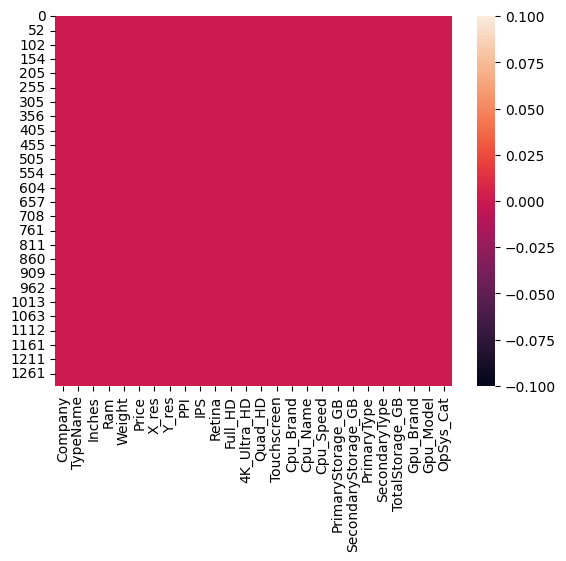

In [ ]:
#no null values and data types also verified
sns.heatmap(df.isnull())

In [ ]:
df.describe()

Inches          Ram       Weight          Price        X_res  \
count  1267.000000  1267.000000  1267.000000    1267.000000  1267.000000   
mean     15.127254     8.426993     2.075239   59565.477344  1891.067088   
std       1.957117     5.525897     0.808475   36521.932905   489.278623   
min      10.100000     1.000000     0.000200    9270.720000  1366.000000   
25%      14.000000     4.000000     1.500000   31914.720000  1600.000000   
50%      15.600000     8.000000     2.040000   52054.560000  1920.000000   
75%      15.600000     8.000000     2.310000   78934.320000  1920.000000   
max      35.600000    64.000000    11.100000  324954.720000  3840.000000   

             Y_res          PPI          IPS       Retina      Full_HD  \
count  1267.000000  1267.000000  1267.000000  1267.000000  1267.000000   
mean   1068.789266   145.822597     0.280979     0.013418     0.647198   
std     281.759730    43.195056     0.449655     0.115100     0.478030   
min     768.000000    44.020000     0.000000     0.000000     0.000000   
25%     900.000000   127.340000     0.000000     0.000000     0.000000   
50%    1080.000000   141.210000     0.000000     0.000000     1.000000   
75%    1080.000000   157.350000     1.000000     0.000000     1.000000   
max    2160.000000   352.470000     1.000000     1.000000     1.000000   

       4K_Ultra_HD      Quad_HD  Touchscreen    Cpu_Speed  PrimaryStorage_GB  \
count  1267.000000  1267.000000  1267.000000  1267.000000        1267.000000   
mean      0.031571     0.022889     0.146014     2.296306         447.554854   
std       0.174923     0.149608     0.353260     0.506352         366.595495   
min       0.000000     0.000000     0.000000     0.900000           0.000000   
25%       0.000000     0.000000     0.000000     2.000000         256.000000   
50%       0.000000     0.000000     0.000000     2.500000         256.000000   
75%       0.000000     0.000000     0.000000     2.700000         512.000000   
max       1.000000     1.000000     1.000000     3.600000        2048.000000   

       SecondaryStorage_GB  TotalStorage_GB  
count          1267.000000      1267.000000  
mean            171.523283       619.078137  
std             412.426979       480.797530  
min               0.000000         0.000000  
25%               0.000000       256.000000  
50%               0.000000       500.000000  
75%               0.000000      1024.000000  
max            2048.000000      2560.000000

Observations:

1.no null values


2.no duplicate features


3.Data type of each feature is validated


4.mean is greater than std in each numeric feaure which is good sign


5. in some features max value is very high compared to 75% so we will treat this later


##Exploratory Data Analysis (EDA)

<Axes: xlabel='count', ylabel='Company'>

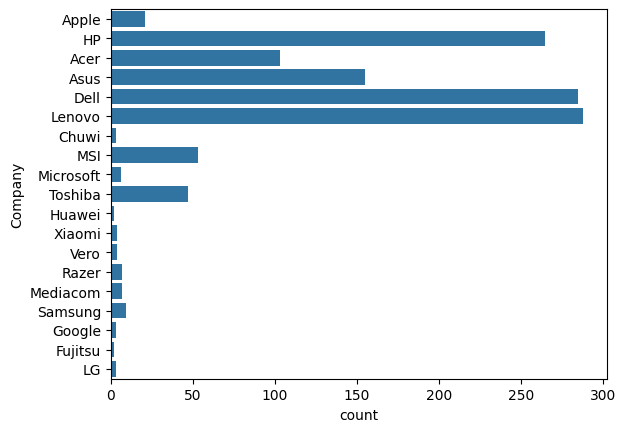

In [ ]:
sns.countplot(df['Company'])

#observation
1.HP,Acer,Asus,Dell,Lenova are most selling laptops
2.Huawei,Fujitsu has less count means less demand


array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

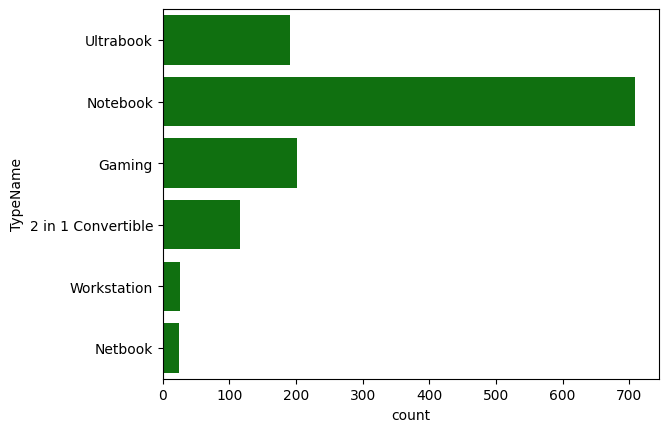

In [ ]:
sns.countplot(df['TypeName'],color = 'green')


df['TypeName'].unique()

#Observation
1.ultrabook,notebook,gaming,2 in 1 convertible are more
2. work station and netbook are less count

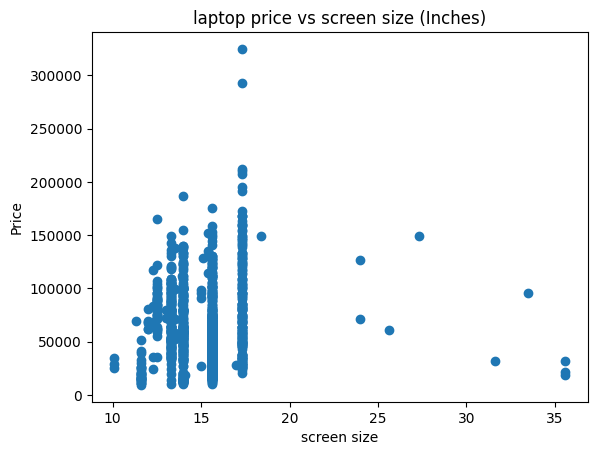

In [ ]:
plt.scatter(df['Inches'],df['Price'])
plt.title('laptop price vs screen size (Inches)')
plt.xlabel('screen size')
plt.ylabel('Price')
plt.show()

#Observation
1.there is no continues price increasing with screen size and most of the screen sizes are between 12 inches to 18 and price also high in this area

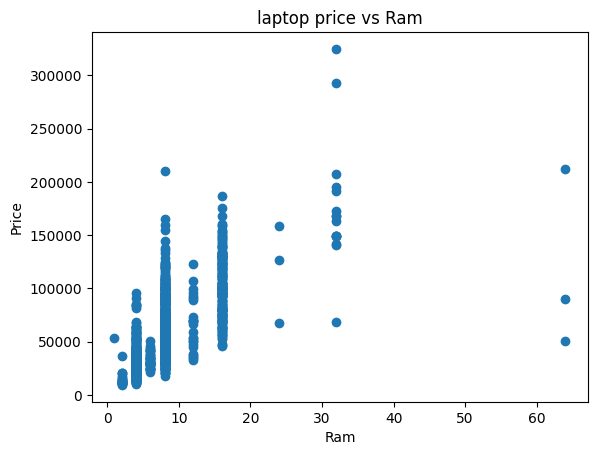

In [ ]:
plt.scatter(df['Ram'],df['Price'])
plt.title('laptop price vs Ram')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

#Observation
1.there is a relationship between RAM and price if RAM size increases price is also increases

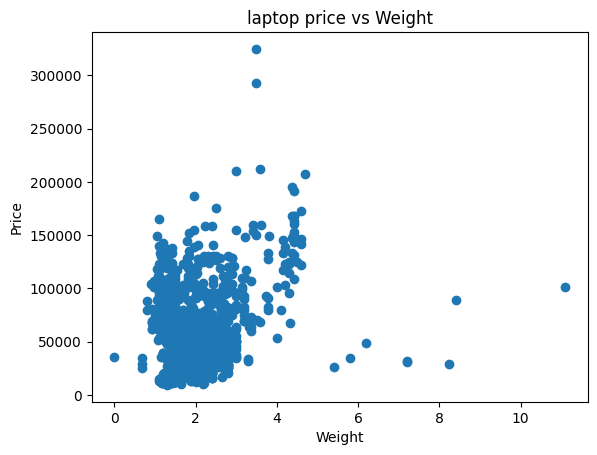

In [ ]:
plt.scatter(df['Weight'],df['Price'])
plt.title('laptop price vs Weight')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

#observation
1. there is a slight relationship between laptop weight with price but most of the laptoip weights are between 1.5kg to 4kg


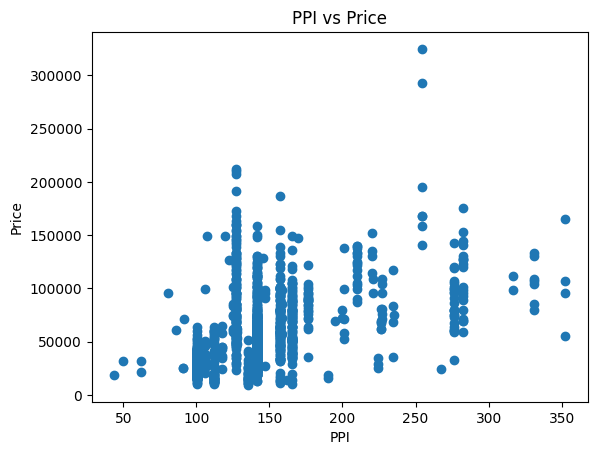

In [ ]:
plt.scatter(df['PPI'],df['Price'])
plt.title('PPI vs Price')
plt.xlabel('PPI')
plt.ylabel('Price')
plt.show()

#observation
1.There is no specific relationship exists with PPI we can see but most of the laptop pixels are between 100 to 300 price is also high in this range we can see

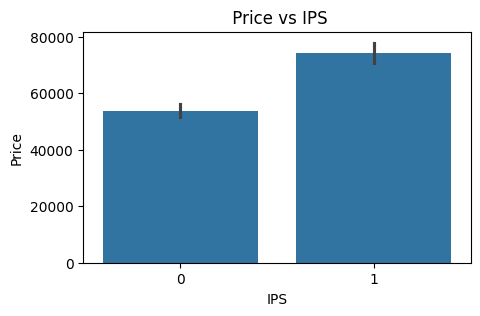

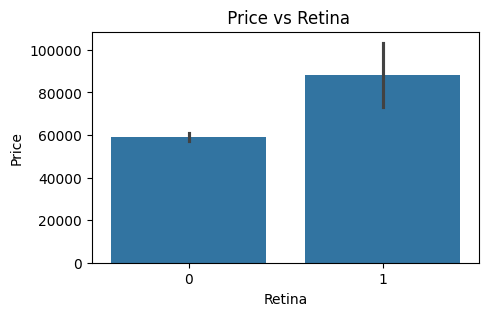

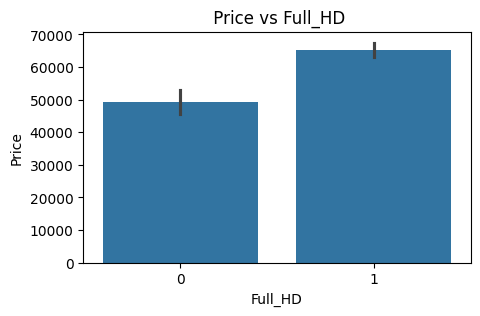

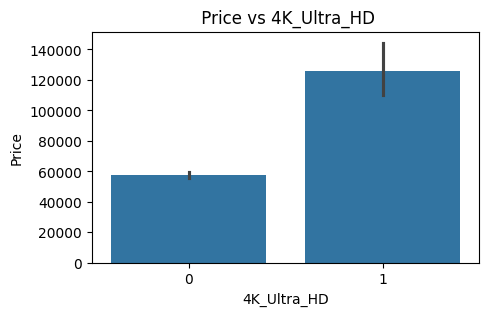

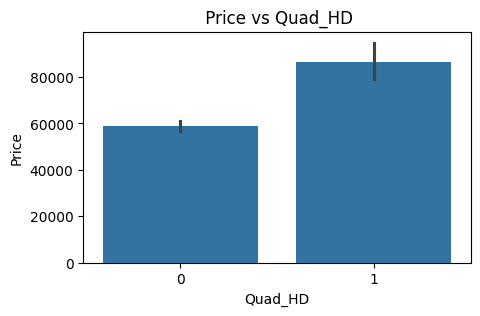

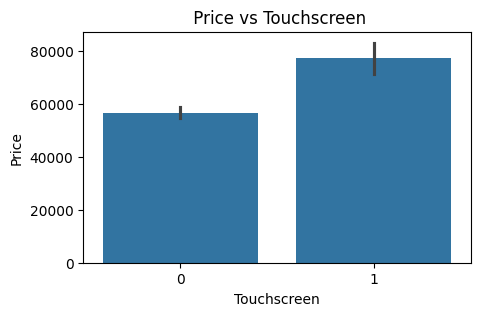

In [ ]:
#price vs screen Resolution
screen_cols = ['IPS', 'Retina', 'Full_HD', '4K_Ultra_HD', 'Quad_HD', 'Touchscreen']

for col in screen_cols:
    plt.figure(figsize=(5,3))
    sns.barplot(x=col, y='Price', data=df)
    plt.title(f' Price vs {col}')
    plt.show()

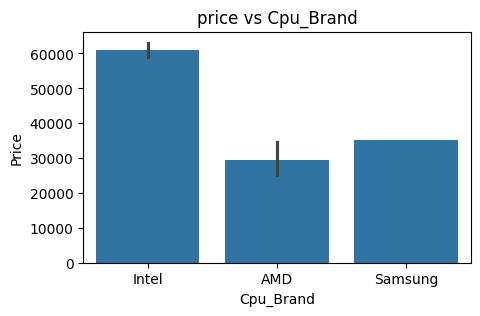

In [ ]:
plt.figure(figsize = (5,3),)
sns.barplot(x ='Cpu_Brand', y = 'Price', data = df)
plt.title(f'price vs Cpu_Brand')
plt.show()

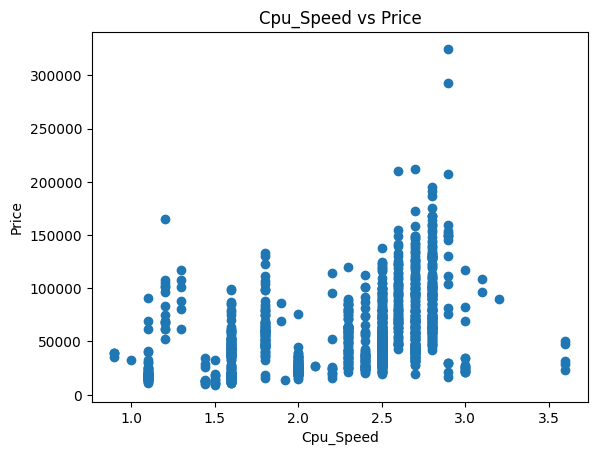

In [71]:
plt.scatter(df['Cpu_Speed'],df['Price'])
plt.title('Cpu_Speed vs Price')
plt.xlabel('Cpu_Speed')
plt.ylabel('Price')
plt.show()

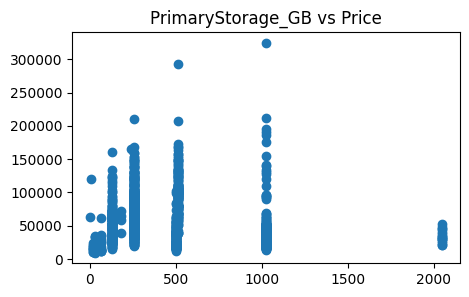

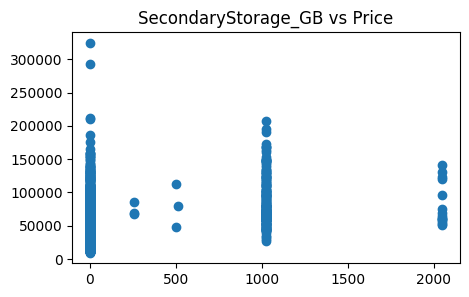

In [72]:
storage = ['PrimaryStorage_GB','SecondaryStorage_GB']

for col in storage:
  plt.figure(figsize = (5,3))
  plt.scatter(x=col, y='Price', data = df)
  plt.title(f'{col} vs Price')
  plt.show()

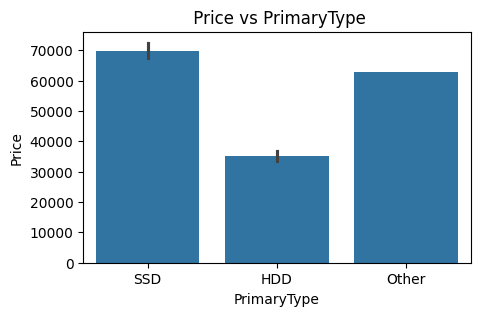

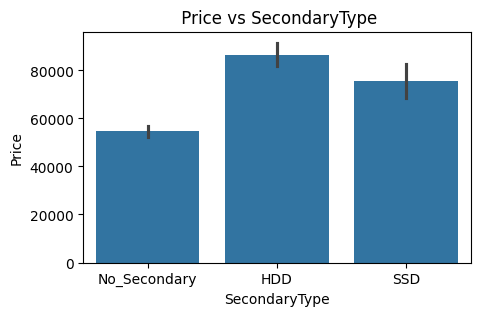

In [73]:
memory_type = ['PrimaryType','SecondaryType']
for col in memory_type:
    plt.figure(figsize=(5,3))
    sns.barplot(x=col, y='Price', data=df)
    plt.title(f' Price vs {col}')
    plt.show()

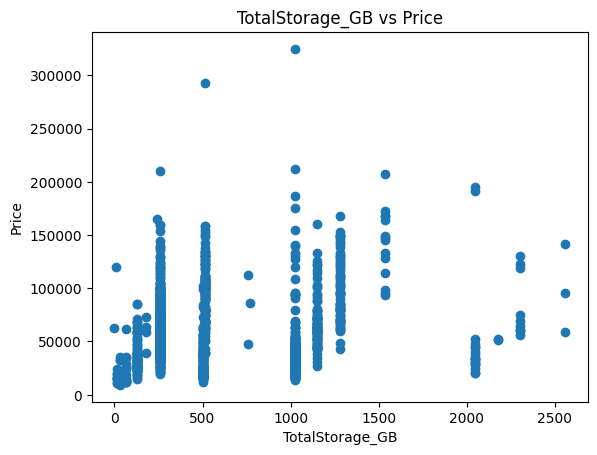

In [74]:
plt.scatter(df['TotalStorage_GB'],df['Price'])
plt.title('TotalStorage_GB vs Price')
plt.xlabel('TotalStorage_GB')
plt.ylabel('Price')
plt.show()

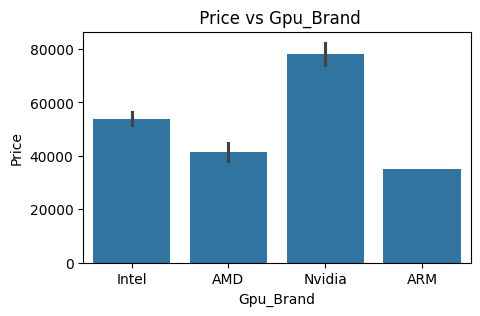

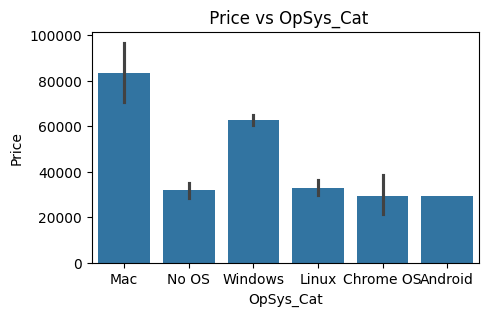

In [75]:
GPU_OS = ['Gpu_Brand','OpSys_Cat']
for col in GPU_OS:
    plt.figure(figsize=(5,3))
    sns.barplot(x=col, y='Price', data=df)
    plt.title(f' Price vs {col}')
    plt.show()

#encoding the categorical data

In [76]:
ctgry_cols = ['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','SecondaryType','OpSys_Cat']


ctgry_cols = ['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','SecondaryType','OpSys_Cat']


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1267 non-null   object 
 1   TypeName             1267 non-null   object 
 2   Inches               1267 non-null   float64
 3   Ram                  1267 non-null   int64  
 4   Weight               1267 non-null   float64
 5   Price                1267 non-null   float64
 6   X_res                1267 non-null   int64  
 7   Y_res                1267 non-null   int64  
 8   PPI                  1267 non-null   float64
 9   IPS                  1267 non-null   int64  
 10  Retina               1267 non-null   int64  
 11  Full_HD              1267 non-null   int64  
 12  4K_Ultra_HD          1267 non-null   int64  
 13  Quad_HD              1267 non-null   int64  
 14  Touchscreen          1267 non-null   int64  
 15  Cpu_Brand            1267 non-null   object

In [78]:
df.nunique()

Company                 19
TypeName                 6
Inches                  25
Ram                     10
Weight                 181
Price                  773
X_res                   13
Y_res                   10
PPI                     48
IPS                      2
Retina                   2
Full_HD                  2
4K_Ultra_HD              2
Quad_HD                  2
Touchscreen              2
Cpu_Brand                3
Cpu_Name                16
Cpu_Speed               25
PrimaryStorage_GB       14
SecondaryStorage_GB      6
PrimaryType              3
SecondaryType            3
TotalStorage_GB         22
Gpu_Brand                4
Gpu_Model              104
OpSys_Cat                6
dtype: int64

#here Gpu_Model has more no of categories and also we have already Gpu_Brans is available so we can neglect Gpu_model hence drop the Gpu_Model

In [79]:
df.drop(columns = ['Gpu_Model'],inplace = True )

/tmp/ipython-input-4183918921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Gpu_Model'],inplace = True )


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1267 non-null   object 
 1   TypeName             1267 non-null   object 
 2   Inches               1267 non-null   float64
 3   Ram                  1267 non-null   int64  
 4   Weight               1267 non-null   float64
 5   Price                1267 non-null   float64
 6   X_res                1267 non-null   int64  
 7   Y_res                1267 non-null   int64  
 8   PPI                  1267 non-null   float64
 9   IPS                  1267 non-null   int64  
 10  Retina               1267 non-null   int64  
 11  Full_HD              1267 non-null   int64  
 12  4K_Ultra_HD          1267 non-null   int64  
 13  Quad_HD              1267 non-null   int64  
 14  Touchscreen          1267 non-null   int64  
 15  Cpu_Brand            1267 non-null   object

In [81]:
ctgry_cols = ['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','Gpu_Brand','OpSys_Cat']

encd = pd.get_dummies(df[['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','Gpu_Brand','OpSys_Cat']],drop_first=True)

#To avoid the result in the form of True or False
encd = encd.astype(int)


In [82]:
encd

Company_Apple  Company_Asus  Company_Chuwi  Company_Dell  \
0                 1             0              0             0   
1                 1             0              0             0   
2                 0             0              0             0   
3                 1             0              0             0   
4                 1             0              0             0   
...             ...           ...            ...           ...   
1298              0             0              0             0   
1299              0             0              0             0   
1300              0             0              0             0   
1301              0             0              0             0   
1302              0             1              0             0   

      Company_Fujitsu  Company_Google  Company_HP  Company_Huawei  Company_LG  \
0                   0               0           0               0           0   
1                   0               0           0               0           0   
2                   0               0           1               0           0   
3                   0               0           0               0           0   
4                   0               0           0               0           0   
...               ...             ...         ...             ...         ...   
1298                0               0           0               0           0   
1299                0               0           0               0           0   
1300                0               0           0               0           0   
1301                0               0           1               0           0   
1302                0               0           0               0           0   

      Company_Lenovo  ...  SecondaryType_No_Secondary  SecondaryType_SSD  \
0                  0  ...                           1                  0   
1                  0  ...                           1                  0   
2                  0  ...                           1                  0   
3                  0  ...                           1                  0   
4                  0  ...                           1                  0   
...              ...  ...                         ...                ...   
1298               1  ...                           1                  0   
1299               1  ...                           1                  0   
1300               1  ...                           1                  0   
1301               0  ...                           1                  0   
1302               0  ...                           1                  0   

      Gpu_Brand_ARM  Gpu_Brand_Intel  Gpu_Brand_Nvidia  OpSys_Cat_Chrome OS  \
0                 0                1                 0                    0   
1                 0                1                 0                    0   
2                 0                1                 0                    0   
3                 0                0                 0                    0   
4                 0                1                 0                    0   
...             ...              ...               ...                  ...   
1298              0                1                 0                    0   
1299              0                1                 0                    0   
1300              0                1                 0                    0   
1301              0                0                 0                    0   
1302              0                1                 0                    0   

      OpSys_Cat_Linux  OpSys_Cat_Mac  OpSys_Cat_No OS  OpSys_Cat_Windows  
0                   0              1                0                  0  
1                   0              1                0                  0  
2                   0              0                1                  0  
3                   0              1                0                  0  
4  

In [83]:
final_df = pd.concat([df, encd], axis=1)
final_df.drop(['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','Gpu_Brand','OpSys_Cat'], axis=1, inplace=True)
final_df

Inches  Ram  Weight        Price  X_res  Y_res     PPI  IPS  Retina  \
0       13.3    8    1.37   71378.6832   2560   1600  226.98    1       1   
1       13.3    8    1.34   47895.5232   1440    900  127.68    0       0   
2       15.6    8    1.86   30636.0000   1920   1080  141.21    0       0   
3       15.4   16    1.83  135195.3360   2880   1800  220.53    1       1   
4       13.3    8    1.37   96095.8080   2560   1600  226.98    1       1   
...      ...  ...     ...          ...    ...    ...     ...  ...     ...   
1298    14.0    4    1.80   33992.6400   1920   1080  157.35    1       0   
1299    13.3   16    1.30   79866.7200   3200   1800  276.05    1       0   
1300    14.0    2    1.50   12201.1200   1366    768  111.94    0       0   
1301    15.6    6    2.19   40705.9200   1366    768  100.45    0       0   
1302    15.6    4    2.20   19660.3200   1366    768  100.45    0       0   

      Full_HD  ...  SecondaryType_No_Secondary  SecondaryType_SSD  \
0           0  ...                           1                  0   
1           0  ...                           1                  0   
2           1  ...                           1                  0   
3           0  ...                           1                  0   
4           0  ...                           1                  0   
...       ...  ...                         ...                ...   
1298        1  ...                           1                  0   
1299        0  ...                           1                  0   
1300        0  ...                           1                  0   
1301        0  ...                           1                  0   
1302        0  ...                           1                  0   

      Gpu_Brand_ARM  Gpu_Brand_Intel  Gpu_Brand_Nvidia  OpSys_Cat_Chrome OS  \
0                 0                1                 0                    0   
1                 0                1                 0                    0   
2                 0                1                 0                    0   
3                 0                0                 0                    0   
4                 0                1                 0                    0   
...             ...              ...               ...                  ...   
1298              0                1                 0                    0   
1299              0                1                 0                    0   
1300              0                1                 0                    0   
1301              0                0                 0                    0   
1302              0                1                 0                    0   

      OpSys_Cat_Linux  OpSys_Cat_Mac  OpSys_Cat_No OS  OpSys_Cat_Windows  
0                   0              1                0                  0  
1                   0              1                0                  0  
2                   0              0                1                  0  
3                   0              1                0                  0  
4                   0              1                0                  0  
...               ...            ...              ...                ...  
1298                0              0                0                  1  
1299                0              0                0                  1  
1300                0              0                0                  1  
1301                0              0                0                  1  
1302                0              0                0                  1  

[1267 rows x 69 columns]

<Axes: >

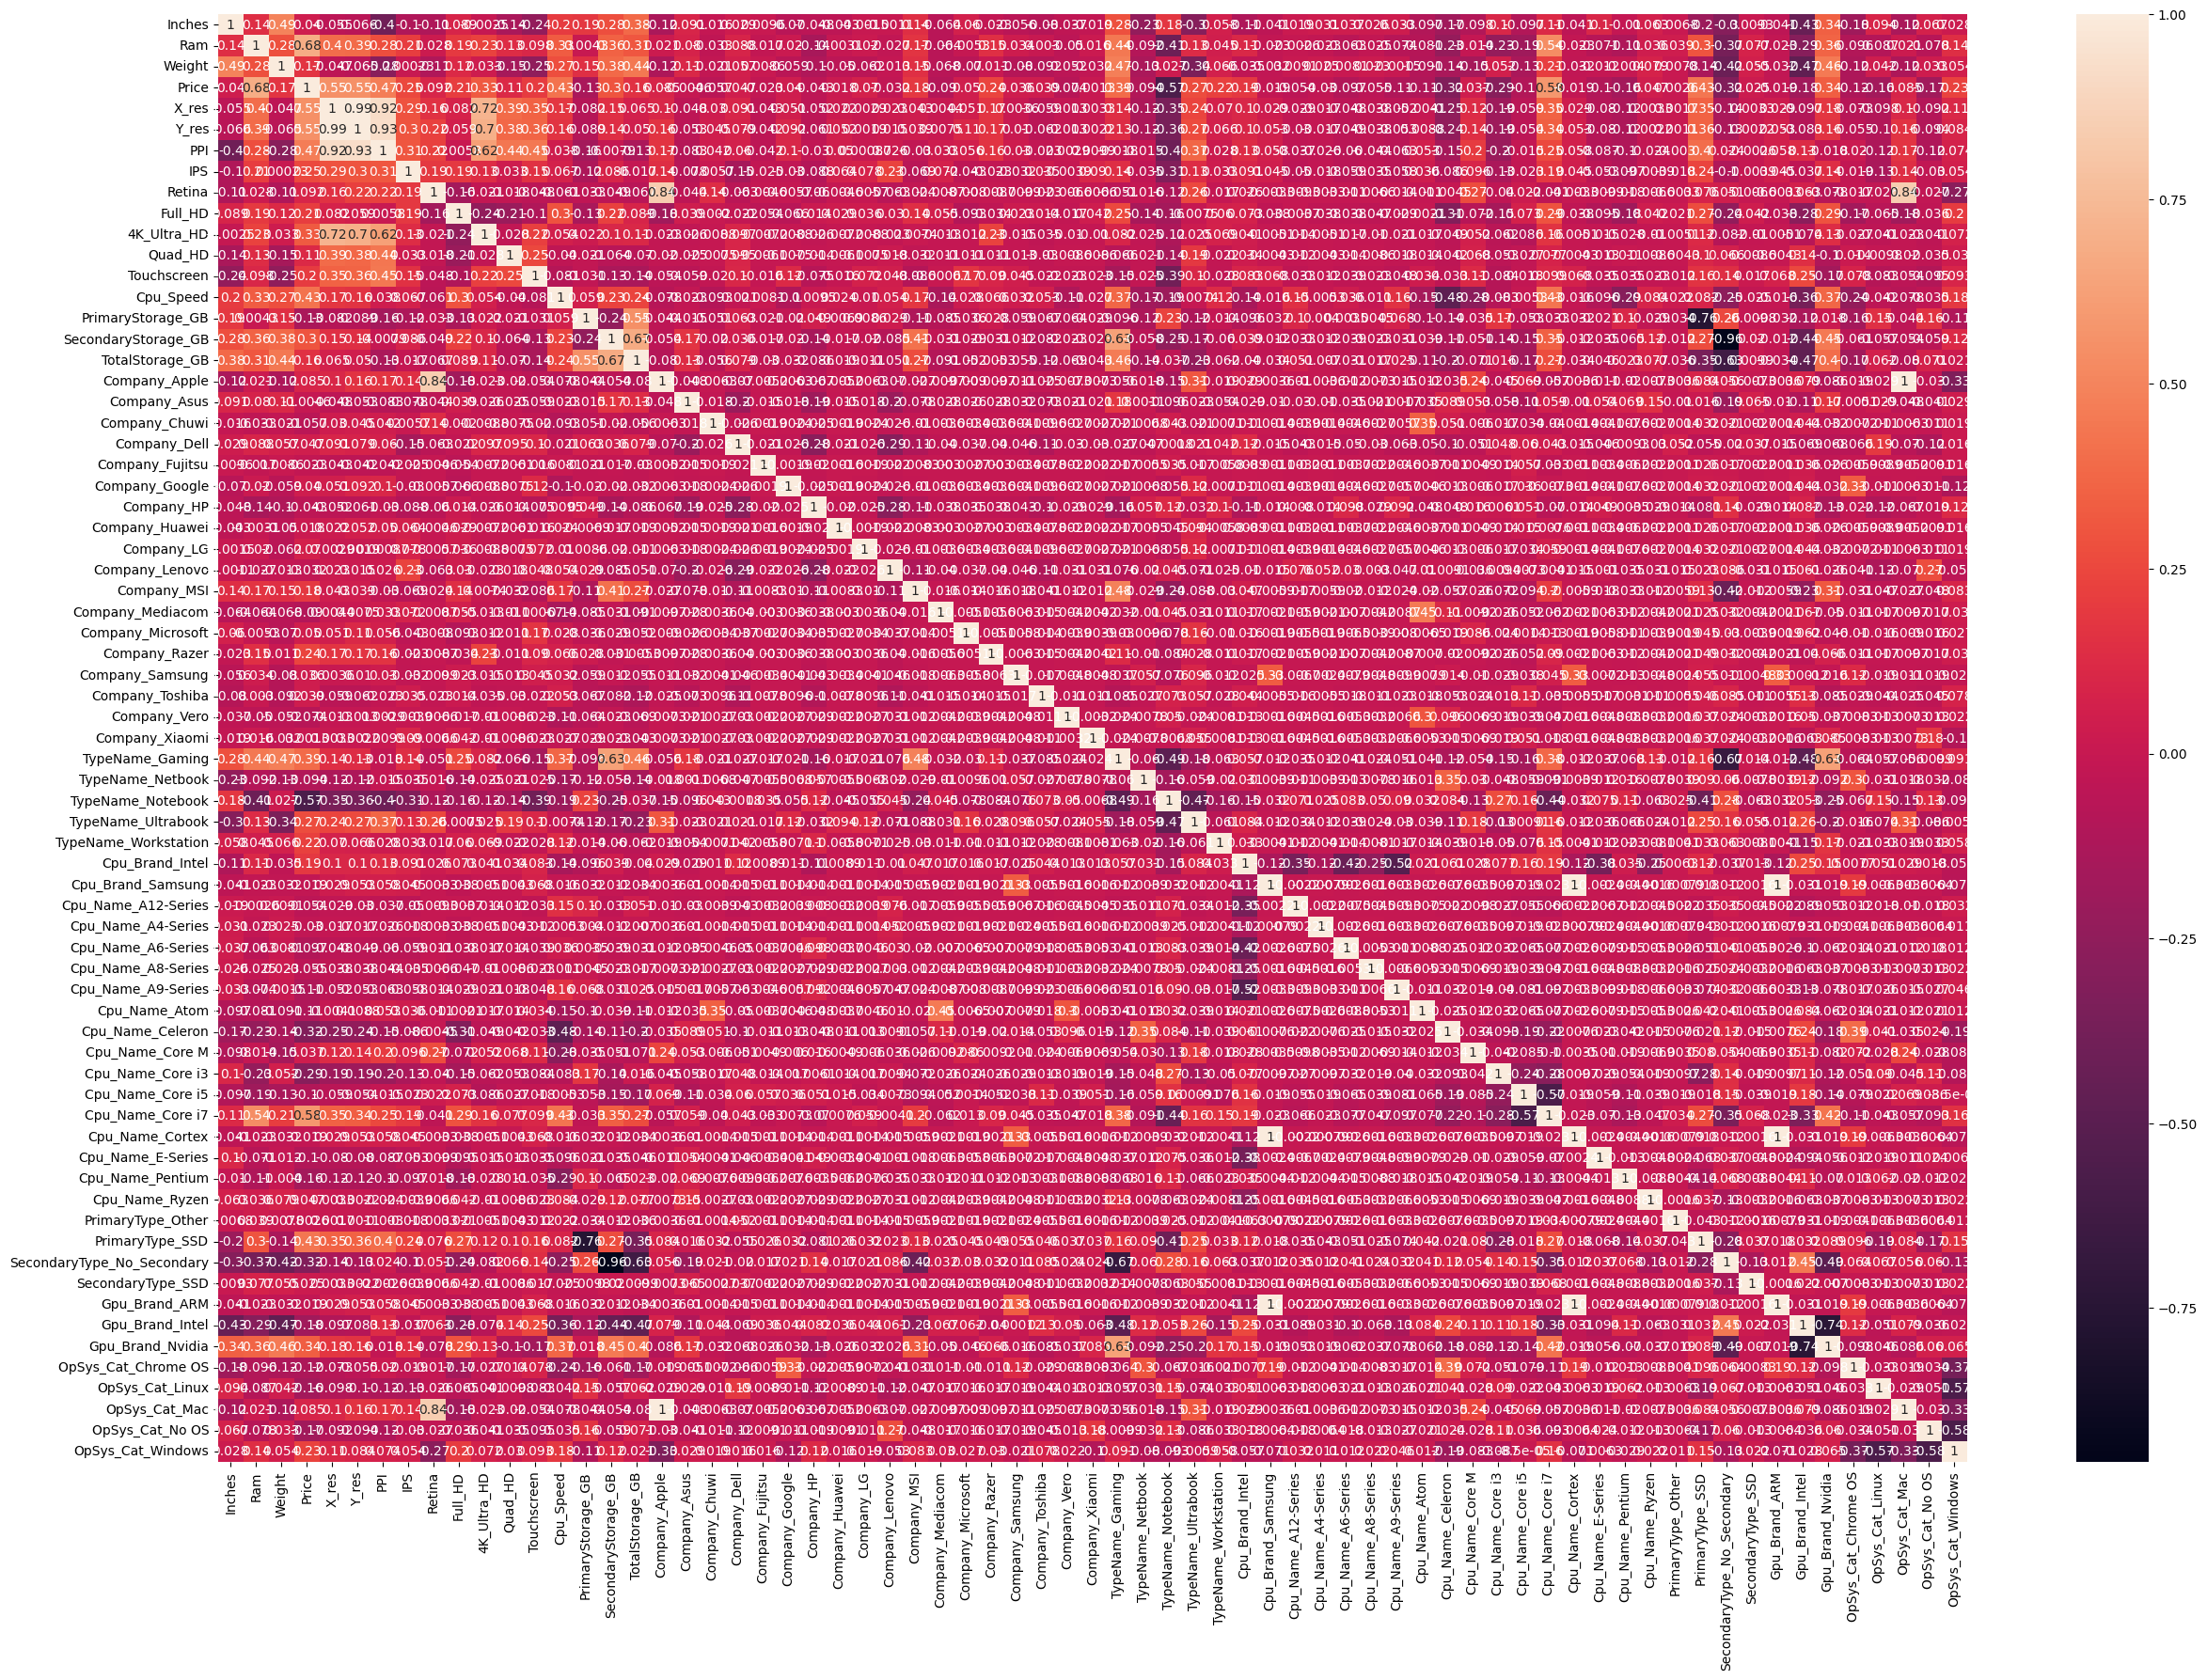

In [ ]:
#checking correlation with variable vs variable

plt.figure(figsize=(30,20))
sns.heatmap(final_df.corr(),annot=True,linecolor='black')

In [84]:
#checking correlation with price
corr_with_price = final_df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
corr_with_price

Price                         1.000000
Ram                           0.682576
Cpu_Name_Core i7              0.579894
X_res                         0.551959
Y_res                         0.548763
                                ...   
Gpu_Brand_Intel              -0.175231
Cpu_Name_Core i3             -0.288612
Cpu_Name_Celeron             -0.316210
SecondaryType_No_Secondary   -0.317883
TypeName_Notebook            -0.565956
Name: Price, Length: 69, dtype: float64

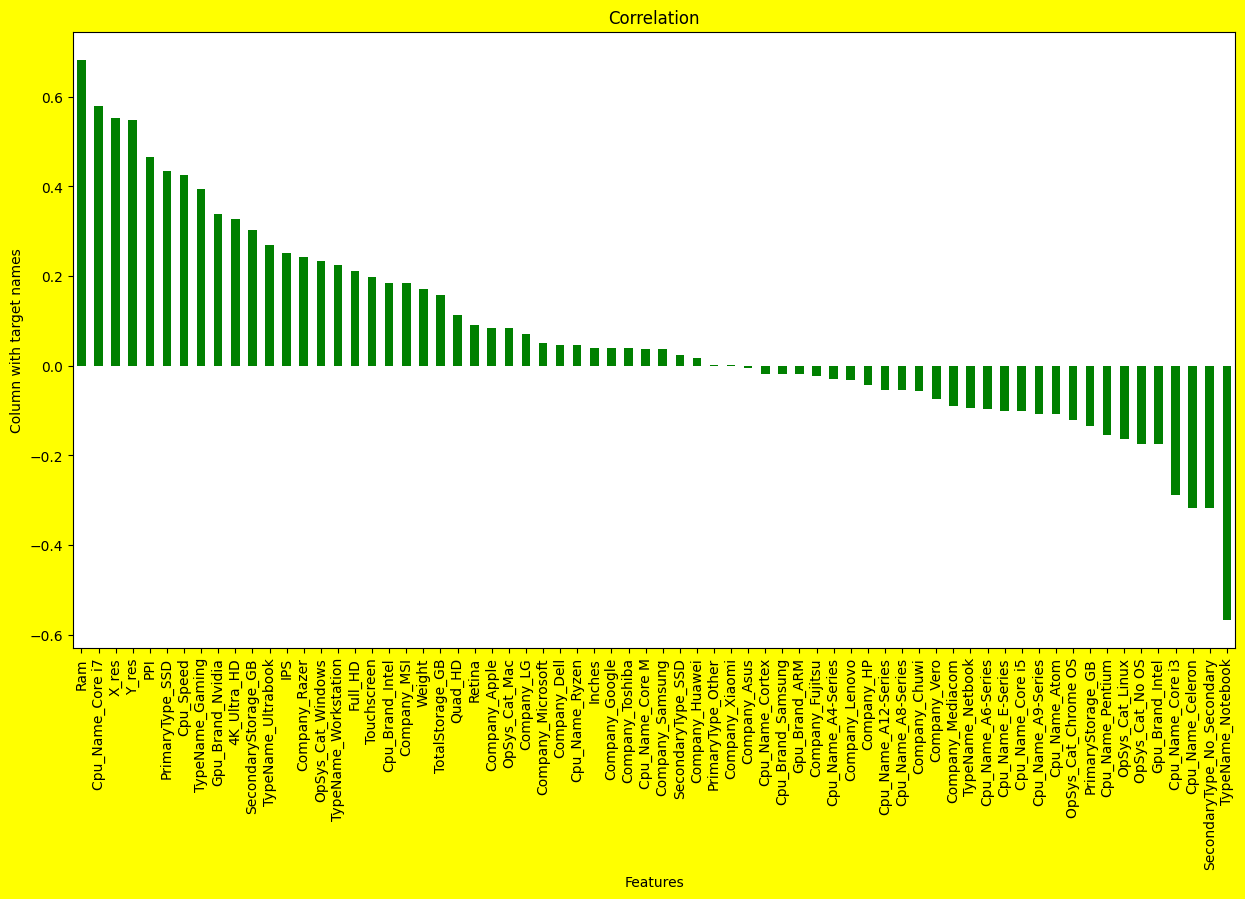

In [85]:
plt.figure(figsize =(15, 8),facecolor='yellow')
final_df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [ ]:
num_data = df.drop(['Company','TypeName','Cpu_Brand','Cpu_Name','PrimaryType','SecondaryType','Gpu_Brand','OpSys_Cat'])
num_data

KeyError: "['Company', 'TypeName', 'Cpu_Brand', 'Cpu_Name', 'PrimaryType', 'SecondaryType', 'Gpu_Brand', 'OpSys_Cat'] not found in axis"

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1267 non-null   object 
 1   TypeName             1267 non-null   object 
 2   Inches               1267 non-null   float64
 3   Ram                  1267 non-null   int64  
 4   Weight               1267 non-null   float64
 5   Price                1267 non-null   float64
 6   X_res                1267 non-null   int64  
 7   Y_res                1267 non-null   int64  
 8   PPI                  1267 non-null   float64
 9   IPS                  1267 non-null   int64  
 10  Retina               1267 non-null   int64  
 11  Full_HD              1267 non-null   int64  
 12  4K_Ultra_HD          1267 non-null   int64  
 13  Quad_HD              1267 non-null   int64  
 14  Touchscreen          1267 non-null   int64  
 15  Cpu_Brand            1267 non-null   object

In [87]:
num_data = df[['Inches','Ram','Weight','Price','X_res','Y_res','Cpu_Speed','PrimaryStorage_GB','SecondaryStorage_GB','TotalStorage_GB']]

In [88]:
num_data

Inches  Ram  Weight        Price  X_res  Y_res  Cpu_Speed  \
0       13.3    8    1.37   71378.6832   2560   1600        2.3   
1       13.3    8    1.34   47895.5232   1440    900        1.8   
2       15.6    8    1.86   30636.0000   1920   1080        2.5   
3       15.4   16    1.83  135195.3360   2880   1800        2.7   
4       13.3    8    1.37   96095.8080   2560   1600        3.1   
...      ...  ...     ...          ...    ...    ...        ...   
1298    14.0    4    1.80   33992.6400   1920   1080        2.5   
1299    13.3   16    1.30   79866.7200   3200   1800        2.5   
1300    14.0    2    1.50   12201.1200   1366    768        1.6   
1301    15.6    6    2.19   40705.9200   1366    768        2.5   
1302    15.6    4    2.20   19660.3200   1366    768        1.6   

      PrimaryStorage_GB  SecondaryStorage_GB  TotalStorage_GB  
0                 128.0                  0.0            128.0  
1                 128.0                  0.0            128.0  
2                 256.0                  0.0            256.0  
3                 512.0                  0.0            512.0  
4                 256.0                  0.0            256.0  
...                 ...                  ...              ...  
1298              128.0                  0.0            128.0  
1299              512.0                  0.0            512.0  
1300               64.0                  0.0             64.0  
1301             1024.0                  0.0           1024.0  
1302              500.0                  0.0            500.0  

[1267 rows x 10 columns]

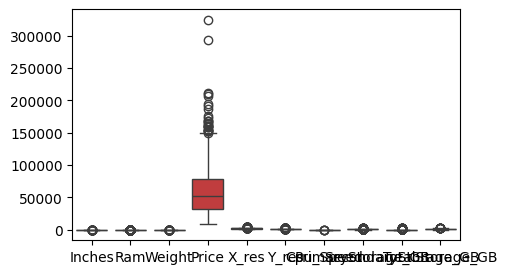

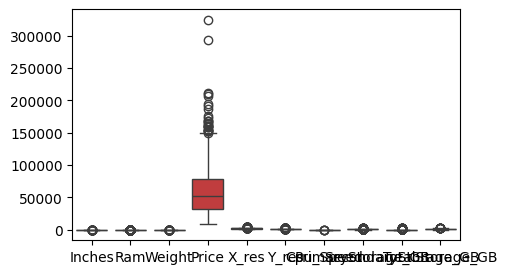

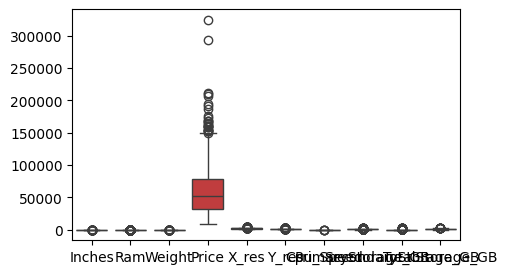

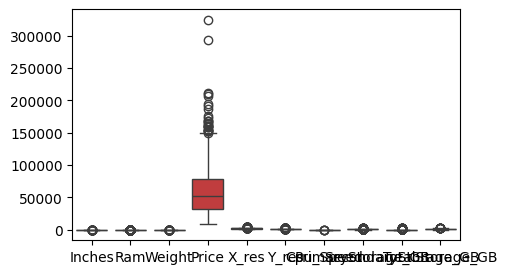

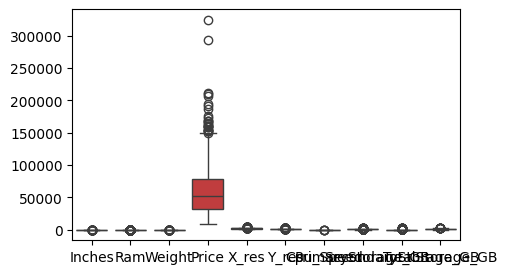

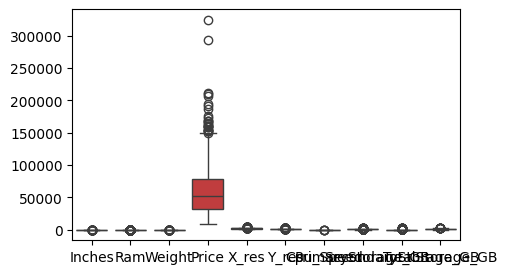

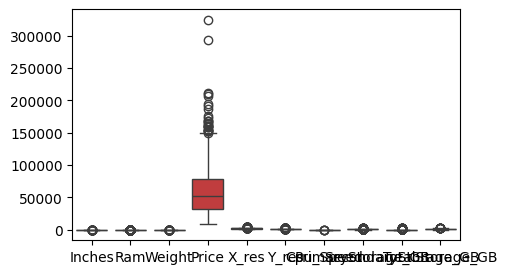

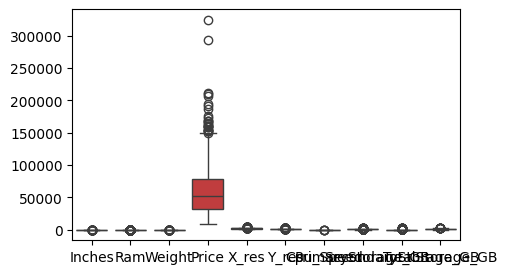

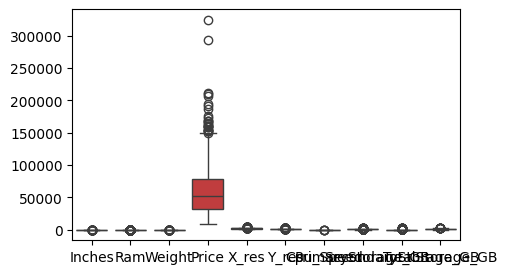

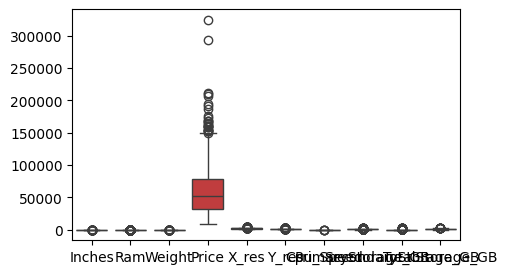

In [ ]:
num_data = df[['Inches','Ram','Weight','Price','X_res','Y_res','Cpu_Speed','PrimaryStorage_GB','SecondaryStorage_GB','TotalStorage_GB']]

for col in num_data:
  plt.figure(figsize=(5,3))
  sns.boxplot(num_data)

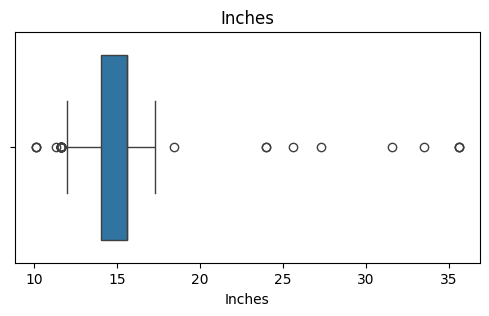

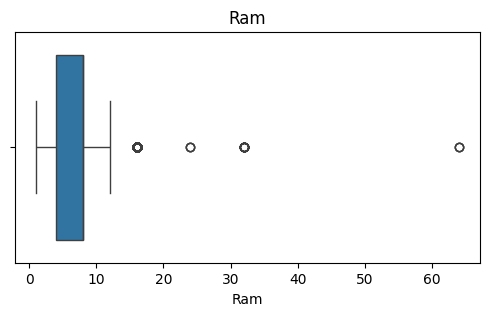

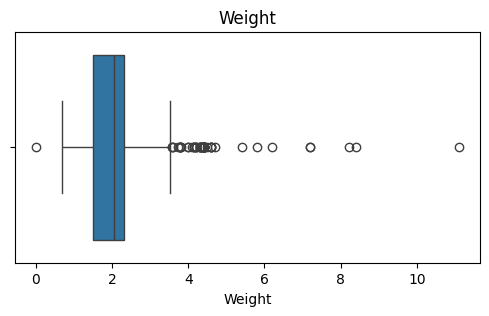

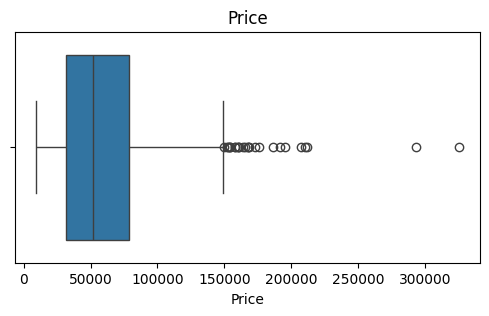

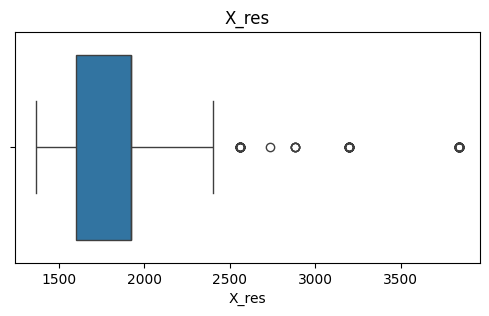

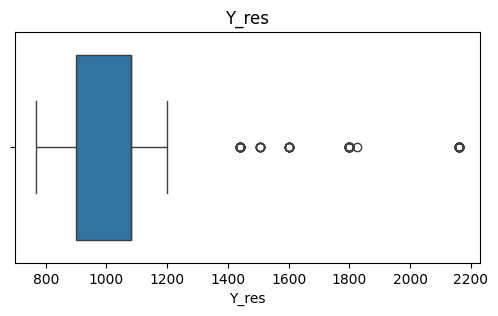

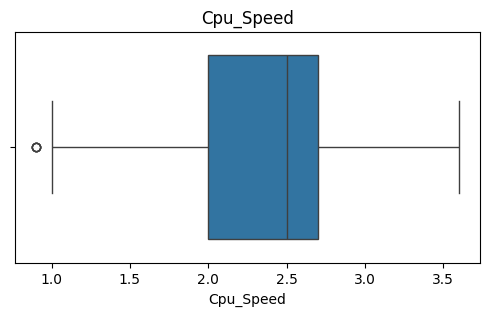

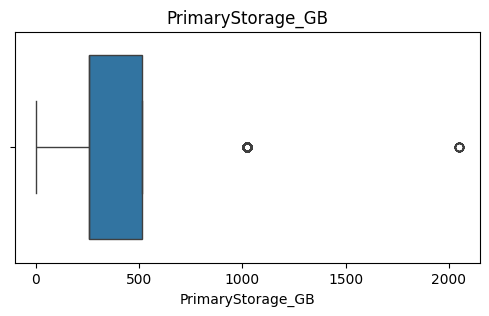

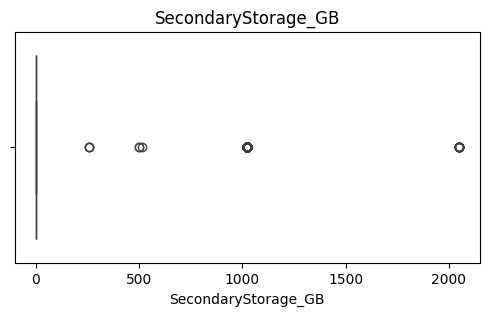

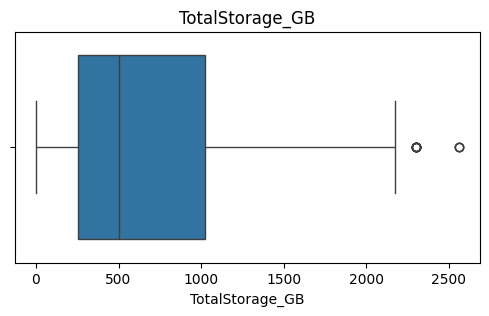

In [89]:
for col in num_data.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=num_data[col])
    plt.title(f'{col}')
    plt.show()

<Axes: xlabel='PPI'>

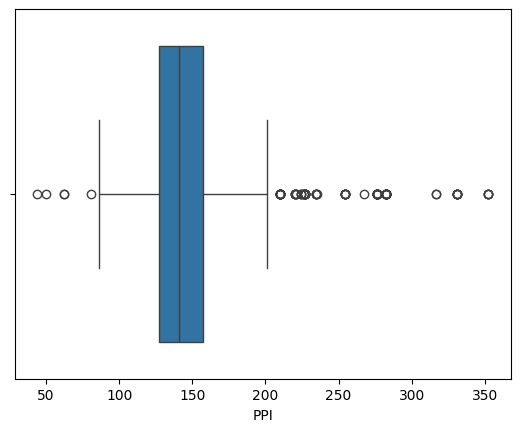

In [90]:
sns.boxplot(x=final_df['PPI'])

In [91]:
print(final_df['PPI'].min())
print(final_df['PPI'].max())

44.02
352.47


Observation:
1.PPI min = 44 and max = 352 are valid for laptops
2.No replacement or dropping is needed    

In [92]:
df.loc[df['Inches'] > 18, ['Company', 'TypeName', 'Inches']]

Company            TypeName  Inches
177        MSI              Gaming    18.4
402     Lenovo            Notebook    25.6
408     Lenovo            Notebook    35.6
423       Asus            Notebook    35.6
424       Dell              Gaming    27.3
438     Lenovo           Ultrabook    24.0
458  Microsoft           Ultrabook    33.5
525     Lenovo            Notebook    24.0
592       Dell  2 in 1 Convertible    31.6
673     Lenovo            Notebook    35.6

Observation:
1. there are outiliers verified in Inches, we can replace it with median

In [93]:
# Compute median only from valid range (<= 18)
median_inch = final_df.loc[df['Inches'] <= 18, 'Inches'].median()

# Replace outliers (> 18) with that median
final_df.loc[final_df['Inches'] > 18, 'Inches'] = median_inch

<Axes: xlabel='Inches'>

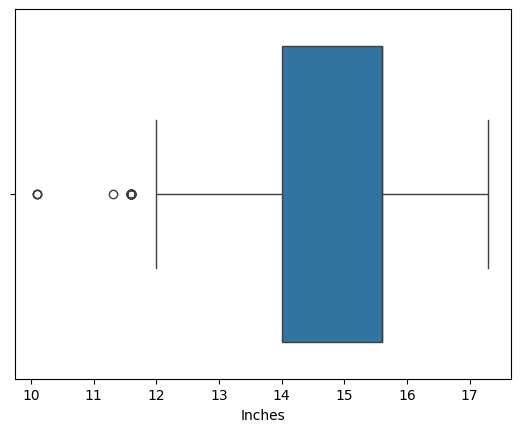

In [94]:
sns.boxplot(x=final_df['Inches'])


In [95]:
df.loc[df['Weight'] >=4, ['Company', 'TypeName', 'Inches']]

Company            TypeName  Inches
133      Acer            Notebook    15.6
173   Toshiba            Notebook    15.6
177       MSI              Gaming    18.4
224      Dell              Gaming    17.3
238      Asus              Gaming    17.3
240    Lenovo            Notebook    15.6
251      Asus              Gaming    17.3
258       MSI              Gaming    17.3
266      Asus  2 in 1 Convertible    13.3
302    Lenovo            Notebook    17.3
326      Acer            Notebook    15.6
424      Dell              Gaming    27.3
456      Dell            Notebook    17.3
494      Asus              Gaming    17.3
530      Dell              Gaming    17.3
552      Dell              Gaming    17.3
577    Lenovo              Gaming    17.3
578       MSI              Gaming    17.3
585       MSI              Gaming    17.3
587    Lenovo           Ultrabook    14.0
603       MSI              Gaming    17.3
630      Asus           Ultrabook    14.0
656      Dell            Notebook    15.6
659      Dell              Gaming    17.3
723      Dell              Gaming    17.3
730      Acer              Gaming    17.3
758      Dell              Gaming    15.6
780      Dell              Gaming    17.3
781      Asus              Gaming    17.3
788      Acer              Gaming    17.3
818      Dell              Gaming    17.3
841      Dell              Gaming    17.3
939      Dell              Gaming    17.3
955      Dell              Gaming    17.3
968      Dell              Gaming    17.3
972      Dell              Gaming    17.3
1048   Lenovo              Gaming    17.3
1061     Asus              Gaming    17.3
1081   Lenovo              Gaming    17.3
1099     Asus              Gaming    17.3
1116   Lenovo              Gaming    17.3
1189     Acer              Gaming    17.3
1197     Asus              Gaming    17.3
1256     Asus              Gaming    17.3

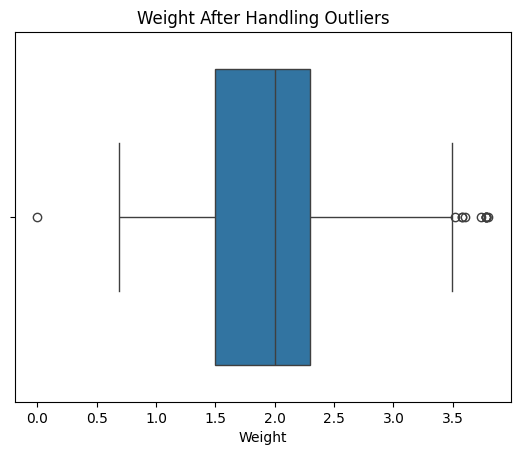

In [96]:
# Calculate median of realistic weights (less than 4 kg)
median_weight = final_df.loc[final_df['Weight'] < 4, 'Weight'].median()

# Replace weights >= 4 kg with median
final_df.loc[final_df['Weight'] >= 4, 'Weight'] = median_weight

# Verify
sns.boxplot(x=final_df['Weight'])
plt.title("Weight After Handling Outliers")
plt.show()

In [97]:
df.loc[df['Weight'] < 1]

Company            TypeName  Inches  Ram  Weight        Price  X_res  \
14      Apple           Ultrabook    12.0    8  0.9200   67260.6720   2304   
81      Apple           Ultrabook    12.0    8  0.9200   80452.8000   2304   
146        HP           Ultrabook    12.5    8  0.9700  107305.9200   3840   
349      Dell           Ultrabook    15.6    8  0.0002   35324.6400   1920   
489      Asus           Ultrabook    12.5   16  0.9100  103896.0000   1920   
746   Samsung           Ultrabook    13.3   16  0.8100   87858.7200   1920   
794     Apple           Ultrabook    12.0    8  0.9200   62071.2000   2304   
812   Samsung           Ultrabook    13.3    8  0.8100   79866.7200   1920   
909        LG           Ultrabook    14.0    8  0.9800  101178.7200   1920   
990        HP             Netbook    12.5    8  0.9700  101658.2400   1920   
1069    Apple           Ultrabook    12.0    8  0.9200   69264.0000   2304   
1080   Lenovo           Ultrabook    12.5    8  0.9900   74538.7200   2560   
1082   Lenovo  2 in 1 Convertible    10.1    4  0.6900   34433.2656   1920   
1114   Lenovo  2 in 1 Convertible    10.1    4  0.6900   29250.7200   1920   
1126   Lenovo  2 in 1 Convertible    10.1    4  0.6900   25521.1200   1920   
1193    Apple           Ultrabook    12.0    8  0.9200   61964.6400   2304   
1210    Apple           Ultrabook    12.0    8  0.9200   68145.1200   2304   

      Y_res     PPI  IPS  ...  Cpu_Brand  Cpu_Name  Cpu_Speed  \
14     1440  226.42    1  ...      Intel    Core M       1.20   
81     1440  226.42    1  ...      Intel   Core i5       1.30   
146    2160  352.47    1  ...      Intel    Core M       1.20   
349    1080  141.21    0  ...      Intel   Core i5       1.60   
489    1080  176.23    0  ...      Intel   Core i7       2.70   
746    1080  165.63    0  ...      Intel   Core i7       2.70   
794    1440  226.42    1  ...      Intel    Core M       1.20   
812    1080  165.63    0  ...      Intel   Core i5       2.50   
909    1080  157.35    1  ...      Intel   Core i7       2.70   
990    1080  176.23    0  ...      Intel    Core M       1.20   
1069   1440  226.42    1  ...      Intel    Core M       1.10   
1080   1440  234.98    1  ...      Intel    Core M       1.20   
1082   1200  224.17    1  ...      Intel      Atom       1.44   
1114   1200  224.17    1  ...      Intel      Atom       1.44   
1126   1200  224.17    1  ...      Intel      Atom       1.44   
1193   1440  226.42    1  ...      Intel    Core M       1.10   
1210   1440  226.42    1  ...      Intel    Core M       1.20   

      PrimaryStorage_GB  SecondaryStorage_GB PrimaryType SecondaryType  \
14                256.0                  0.0         SSD  No_Secondary   
81                512.0                  0.0         SSD  No_Secondary   
146               512.0                  0.0         SSD  No_Secondary   
349              1024.0                  0.0         HDD  No_Secondary   
489               512.0                  0.0         SSD  No_Secondary   
746               256.0                  0.0         SSD  No_Secondary   
794               512.0                  0.0         SSD  No_Secondary   
812               256.0                  0.0         SSD  No_Secondary   
909               512.0                  0.0         SSD  No_Secondary   
990               512.0                  0.0         SSD  No_Secondary   
1069              256.0                  0.0         SSD  No_Secondary   
1080              512.0                  0.0         SSD  No_Secondary   
1082               64.0                  0.0         SSD  No_Secondary   
1114               64.0                  0.0         SSD  No_Secondary   
1126               64.0                  0.0         SSD  No_Secondary   
1193              256.0                  0.0         SSD  No_Secondary   
1210              512.0                  0.0         SSD  No_Secondary   

      TotalStorage_GB  Gpu_Brand  OpSys_Cat  
14              256.0      Intel        Mac  
81   

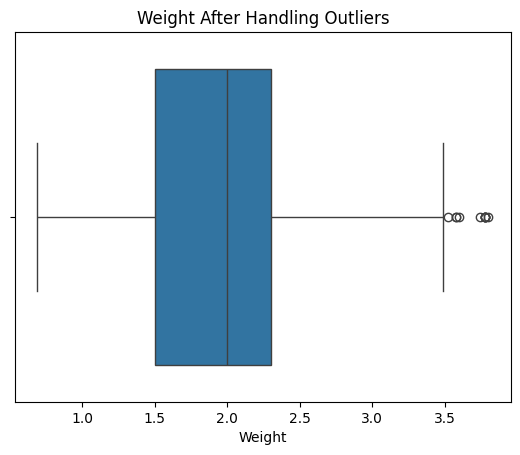

In [98]:
#there is one data point which weight is 0.0002kg which is unrealistic so i can repalce it with median value
final_df.loc[final_df['Weight'] == 0.0002, 'Weight'] = median_weight
# Verify
sns.boxplot(x=final_df['Weight'])
plt.title("Weight After Handling Outliers")
plt.show()

In [99]:
final_df.head()

Inches  Ram  Weight        Price  X_res  Y_res     PPI  IPS  Retina  \
0    13.3    8    1.37   71378.6832   2560   1600  226.98    1       1   
1    13.3    8    1.34   47895.5232   1440    900  127.68    0       0   
2    15.6    8    1.86   30636.0000   1920   1080  141.21    0       0   
3    15.4   16    1.83  135195.3360   2880   1800  220.53    1       1   
4    13.3    8    1.37   96095.8080   2560   1600  226.98    1       1   

   Full_HD  ...  SecondaryType_No_Secondary  SecondaryType_SSD  Gpu_Brand_ARM  \
0        0  ...                           1                  0              0   
1        0  ...                           1                  0              0   
2        1  ...                           1                  0              0   
3        0  ...                           1                  0              0   
4        0  ...                           1                  0              0   

   Gpu_Brand_Intel  Gpu_Brand_Nvidia  OpSys_Cat_Chrome OS  OpSys_Cat_Linux  \
0                1                 0                    0                0   
1                1                 0                    0                0   
2                1                 0                    0                0   
3                0                 0                    0                0   
4                1                 0                    0                0   

   OpSys_Cat_Mac  OpSys_Cat_No OS  OpSys_Cat_Windows  
0              1                0                  0  
1              1                0                  0  
2              0                1                  0  
3              1                0                  0  
4              1                0                  0  

[5 rows x 69 columns]

In [100]:
final_df[final_df['TotalStorage_GB'] == 0]

Inches  Ram  Weight       Price  X_res  Y_res     PPI  IPS  Retina  \
770    15.6   16     2.3  62938.0656   1920   1080  141.21    0       0   

     Full_HD  ...  SecondaryType_No_Secondary  SecondaryType_SSD  \
770        1  ...                           1                  0   

     Gpu_Brand_ARM  Gpu_Brand_Intel  Gpu_Brand_Nvidia  OpSys_Cat_Chrome OS  \
770              0                0                 0                    0   

     OpSys_Cat_Linux  OpSys_Cat_Mac  OpSys_Cat_No OS  OpSys_Cat_Windows  
770                0              0                0                  1  

[1 rows x 69 columns]

<Axes: xlabel='TotalStorage_GB'>

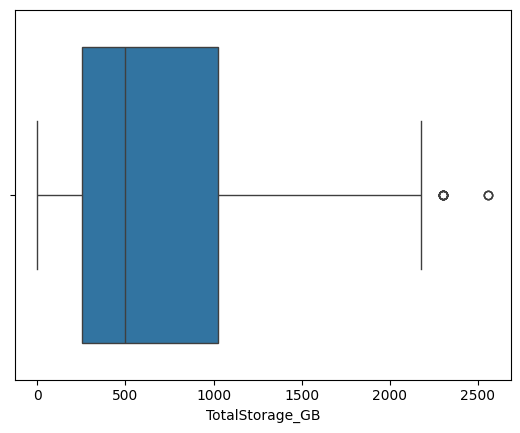

In [101]:
#replace 0.0 of total_storage with median
median_storage = final_df['TotalStorage_GB'].median()
df.loc[final_df['TotalStorage_GB'] == 0, 'TotalStorage_GB'] = median_storage
sns.boxplot(x=final_df['TotalStorage_GB'])

#verify the skewness

In [102]:
sk = final_df.skew()  # returns a Series where index = column name, value = skewness

for col, value in sk.items():
    print(f"{col}:   {value:.3f}")

Inches:   -0.431
Ram:   3.663
Weight:   0.351
Price:   1.437
X_res:   2.189
Y_res:   2.099
PPI:   1.988
IPS:   0.976
Retina:   8.468
Full_HD:   -0.617
4K_Ultra_HD:   5.364
Quad_HD:   6.388
Touchscreen:   2.007
Cpu_Speed:   -0.839
PrimaryStorage_GB:   1.568
SecondaryStorage_GB:   2.316
TotalStorage_GB:   1.068
Company_Apple:   7.582
Company_Asus:   2.308
Company_Chuwi:   20.502
Company_Dell:   1.319
Company_Fujitsu:   25.140
Company_Google:   20.502
Company_HP:   1.432
Company_Huawei:   25.140
Company_LG:   20.502
Company_Lenovo:   1.303
Company_MSI:   4.582
Company_Mediacom:   13.358
Company_Microsoft:   14.445
Company_Razer:   13.358
Company_Samsung:   11.752
Company_Toshiba:   4.904
Company_Vero:   17.734
Company_Xiaomi:   17.734
TypeName_Gaming:   1.871
TypeName_Netbook:   7.066
TypeName_Notebook:   -0.240
TypeName_Ultrabook:   1.954
TypeName_Workstation:   6.772
Cpu_Brand_Intel:   -4.227
Cpu_Brand_Samsung:   35.595
Cpu_Name_A12-Series:   12.480
Cpu_Name_A4-Series:   35.595
Cpu_Name

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1267 non-null   object 
 1   TypeName             1267 non-null   object 
 2   Inches               1267 non-null   float64
 3   Ram                  1267 non-null   int64  
 4   Weight               1267 non-null   float64
 5   Price                1267 non-null   float64
 6   X_res                1267 non-null   int64  
 7   Y_res                1267 non-null   int64  
 8   PPI                  1267 non-null   float64
 9   IPS                  1267 non-null   int64  
 10  Retina               1267 non-null   int64  
 11  Full_HD              1267 non-null   int64  
 12  4K_Ultra_HD          1267 non-null   int64  
 13  Quad_HD              1267 non-null   int64  
 14  Touchscreen          1267 non-null   int64  
 15  Cpu_Brand            1267 non-null   object

In [104]:
#binary_cols
binary_cols = [col for col in final_df if final_df[col].dropna().isin([0,1]).all()]
binary_cols

['IPS',
 'Retina',
 'Full_HD',
 '4K_Ultra_HD',
 'Quad_HD',
 'Touchscreen',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_Huawei',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'Cpu_Brand_Intel',
 'Cpu_Brand_Samsung',
 'Cpu_Name_A12-Series',
 'Cpu_Name_A4-Series',
 'Cpu_Name_A6-Series',
 'Cpu_Name_A8-Series',
 'Cpu_Name_A9-Series',
 'Cpu_Name_Atom',
 'Cpu_Name_Celeron',
 'Cpu_Name_Core M',
 'Cpu_Name_Core i3',
 'Cpu_Name_Core i5',
 'Cpu_Name_Core i7',
 'Cpu_Name_Cortex',
 'Cpu_Name_E-Series',
 'Cpu_Name_Pentium',
 'Cpu_Name_Ryzen',
 'PrimaryType_Other',
 'PrimaryType_SSD',
 'SecondaryType_No_Secondary',
 'SecondaryType_SSD',
 'Gpu_Brand_ARM',
 'Gpu_Bra

In [105]:
continuous_cols = [col for col in final_df if col not in binary_cols]

continuous_cols

['Inches',
 'Ram',
 'Weight',
 'Price',
 'X_res',
 'Y_res',
 'PPI',
 'Cpu_Speed',
 'PrimaryStorage_GB',
 'SecondaryStorage_GB',
 'TotalStorage_GB']

In [106]:
skew_cols=final_df[continuous_cols].skew()
skew_cols

Inches                -0.430642
Ram                    3.662695
Weight                 0.350875
Price                  1.437297
X_res                  2.188833
Y_res                  2.099135
PPI                    1.988329
Cpu_Speed             -0.839002
PrimaryStorage_GB      1.567755
SecondaryStorage_GB    2.315885
TotalStorage_GB        1.068221
dtype: float64

In [107]:
#Transform highly skewed continuous features
high_skew = skew_cols[abs(skew_cols) > 1].index  # threshold for high skew
for col in high_skew:
    final_df[col] = np.log1p(final_df[col])

In [108]:
final_df[continuous_cols].skew()

Inches                -0.430642
Ram                    0.499790
Weight                 0.350875
Price                 -0.186558
X_res                  0.982028
Y_res                  0.973863
PPI                    0.780352
Cpu_Speed             -0.839002
PrimaryStorage_GB     -0.786137
SecondaryStorage_GB    1.877877
TotalStorage_GB       -0.980826
dtype: float64

In [109]:
#split the dataset
X = final_df.drop(columns='Price')
y = final_df['Price']

In [148]:
#train-test split:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#scaling the continous cols only
#since binary cols are already in the range of 0 and 1 so no need to scale them again

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Inches','Ram','Weight','X_res','Y_res','Cpu_Speed',
            'PrimaryStorage_GB','SecondaryStorage_GB','TotalStorage_GB','PPI']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [113]:
#Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [114]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        print('=======train results===========')
        print(f'accuracy score:{r2_score(y_train,y_pred)*100:2f}%')
        print('\n')

    elif train==False:
        pred=clf.predict(X_test)
        print('=======test results=========')
        print(f"r2score is:{r2_score(y_test,pred)*100:2f}%")
        print('\n')

In [115]:

lm=LinearRegression()
lm.fit(X_train,y_train)

print_score(lm,X_train,X_train,y_train,y_test,train=True)
print_score(lm,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:86.991691%


=======test results=========
r2score is:82.716581%




#**random Forest regressor**

In [116]:
#random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(X_train,y_train)

print_score(rfc,X_train,X_test,y_train,y_test,train=True)
print_score(rfc,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:98.202949%


=======test results=========
r2score is:87.821743%




#**GradientBoostingRegressor**

In [117]:
#GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

print_score(gbr,X_train,X_test,y_train,y_test,train=True)
print_score(gbr,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:91.990132%


=======test results=========
r2score is:87.214311%




#**BaggingRegressor**

In [118]:
#BaggingRegressor

from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(X_train,y_train)

print_score(bgr,X_train,X_test,y_train,y_test,train=True)
print_score(bgr,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:97.811095%


=======test results=========
r2score is:86.254935%




#**DecisionTreeRegressor**

In [119]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

print_score(dtr,X_train,X_test,y_train,y_test,train=True)
print_score(dtr,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:99.790680%


=======test results=========
r2score is:80.691411%




#**xgb** **regressor**

In [120]:
#xgb regressor
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)

print_score(dtr,X_train,X_test,y_train,y_test,train=True)
print_score(dtr,X_train,X_test,y_train,y_test,train=False)

=======train results===========
accuracy score:99.790680%


=======test results=========
r2score is:80.691411%




##apart from all the models **random forest** gives best score

#evaluation metrics

In [121]:
y_pred=rfc.predict(X_train)
pred=rfc.predict(X_test)

In [122]:
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error is: 0.165558946173491


mean squared error is: 0.04989011683255192


Root mean suared error is: 0.22336095637454617


In [136]:
y_pred = rfc.predict(X_test)

In [137]:
#converitng the price into actual rupees
y_pred_actual = np.expm1(y_pred)  # reverse log1p
y_test_actual = np.expm1(y_test)

In [138]:
print('mean absolute error is:',mean_absolute_error(y_test_actual,y_pred_actual))
print('\n')
print('mean squared error is:',mean_squared_error(y_test_actual,y_pred_actual))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test_actual,y_pred_actual)))

mean absolute error is: 10384.762814696805


mean squared error is: 304802986.3168026


Root mean suared error is: 17458.60780007394


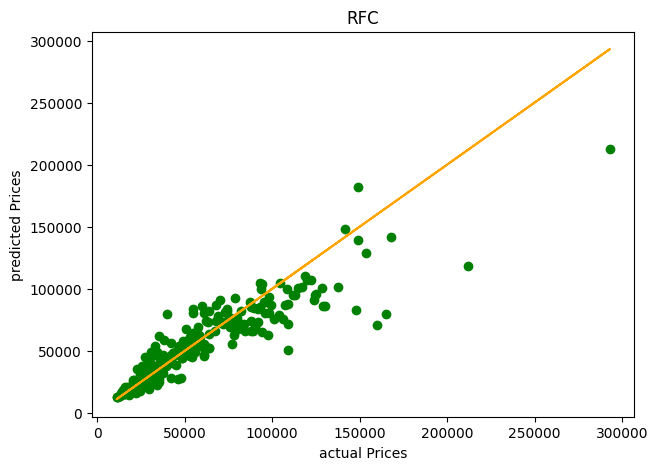

In [142]:

plt.figure(figsize=(7,5))
plt.scatter(x=y_test_actual,y=y_pred_actual,color='green')
plt.plot(y_test_actual,y_test_actual,color='orange')
plt.xlabel('actual Prices')
plt.ylabel('predicted Prices')
plt.title('RFC')
plt.show()

In [143]:
#regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,1,0.1],'random_state':[1,3,5,6,7,9,8,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [146]:
ls=Lasso(alpha=0.001,random_state=1)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)

lss

0.8201415901365523

In [149]:
cv_score=cross_val_score(ls,X,y,cv=15).mean()
cv_score

np.float64(0.8222791932337581)

#hyperparameter tunning

In [150]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['squared_error','absolute_error','poisson'],
             'n_estimators': [15,17],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,15],
             'min_samples_split': [5,7],
             'min_samples_leaf': [4,5,]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 17}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

In [152]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt',max_depth=15,min_samples_leaf=4,min_samples_split=5,n_estimators=17)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

pred=rf.predict(X_test)

rfs=r2_score(y_test,pred)
print('r2score',rfs*100)

rfcscore=cross_val_score(rf,X,y,cv=2).mean()
print('cross validation score is',rfcscore*100)

r2score 82.94436835318434
cross validation score is 78.71424470817566


In [153]:
#save the model
import joblib
joblib.dump(rf,'laptop price.obj')

['laptop price.obj']

In [160]:
#model predictions
model=joblib.load('laptop price.obj')
pred=rfc.predict(X_test)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [161]:
predict_values

actual    predict
1247  11.727044  12.079644
1073  10.969511  11.755361
435   11.411010  11.881065
1153  11.064820  11.735016
875   11.408056  11.876747
...         ...        ...
170   11.182694  11.856233
501   10.403680  11.774569
644   10.084850  11.384391
231    9.774711  11.398626
253   11.497971  11.912019

[254 rows x 2 columns]

In [162]:
#model predictions in rupees
model=joblib.load('laptop price.obj')
pred=rfc.predict(X_test)
predict_values=pd.DataFrame({'actual':y_test_actual,'predict':y_pred_actual})

In [163]:
predict_values

actual       predict
1247  123876.0000  90843.824243
1073   58075.2000  63196.431086
435    90309.6000  69114.408767
1153   63882.7200  52682.601097
875    90043.2000  68757.792497
...           ...           ...
170    71874.7200  73624.009943
501    32979.7872  32455.806528
644    23976.0000  22920.812973
231    17582.4000  17487.134798
253    98514.7200  80918.282794

[254 rows x 2 columns]